# Clase 1: Conociendo nuestros datos de pingüinos 🗺🐧

## Instalar librerias necesarias 

In [1]:
%pip install --upgrade pip
%pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels scikit-learn  pyjanitor


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import palmerpenguins
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as su
import statsmodels.formula.api as smf
import statsmodels.stats as ss 


## Establecer apariencia general de los datos 

In [3]:
%matplotlib inline 
sns.set_style(style= 'whitegrid')
sns.set_context(context= 'notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie'    : '#ff6602ff',
    'Gentoo'    : '#0f7175ff',
    'Chinstrap' : '#c65dc9ff'
}

# Cargar los datos 

## Utilizando el paquete palmerpeguins 

#### Datos crudos 

In [4]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

### Datos previamente procesados  

In [5]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando conjunto de datos de Seaborn 

In [6]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

# Colecta y validación de datos 

### ¿Qué tipo de dato son las variables del conjunto de dato?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### Cuantas variables de cada tipo de dato tenemos en el cojunto de datos ?

In [8]:
preprocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

### ¿Existen valores nulos en el conjunto de datos?

In [10]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### ¿Cuál es la proporcion de valores nulos por cada variable?

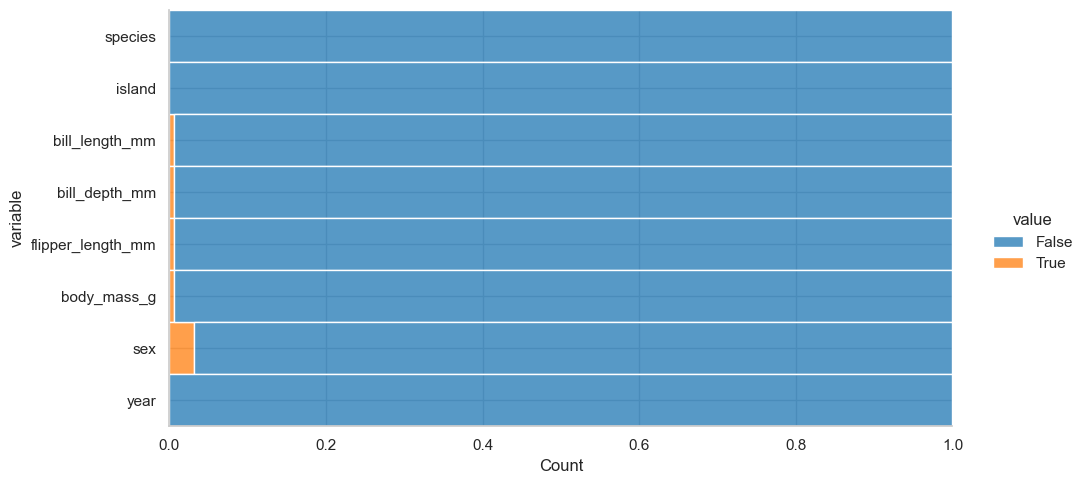

In [11]:
view = preprocess_penguins_df.isnull().melt()
sns.displot(data= view, y= 'variable', hue= 'value', multiple = 'fill', aspect= 2)

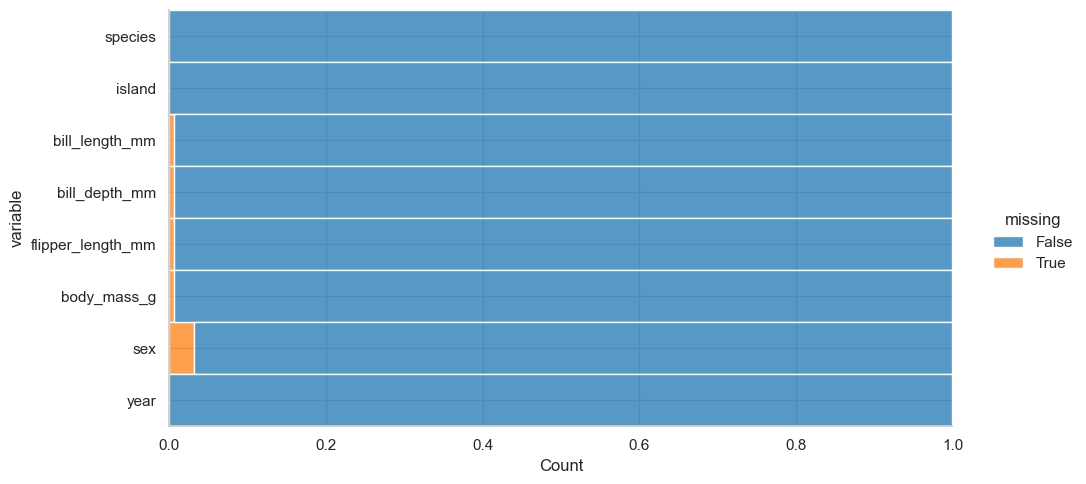

In [12]:
## Otra forma de hacerlo
(
    preprocess_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cómo podemos visualizar el conjuto de valores nulos en todo el conjunto de datos?

<Axes: >

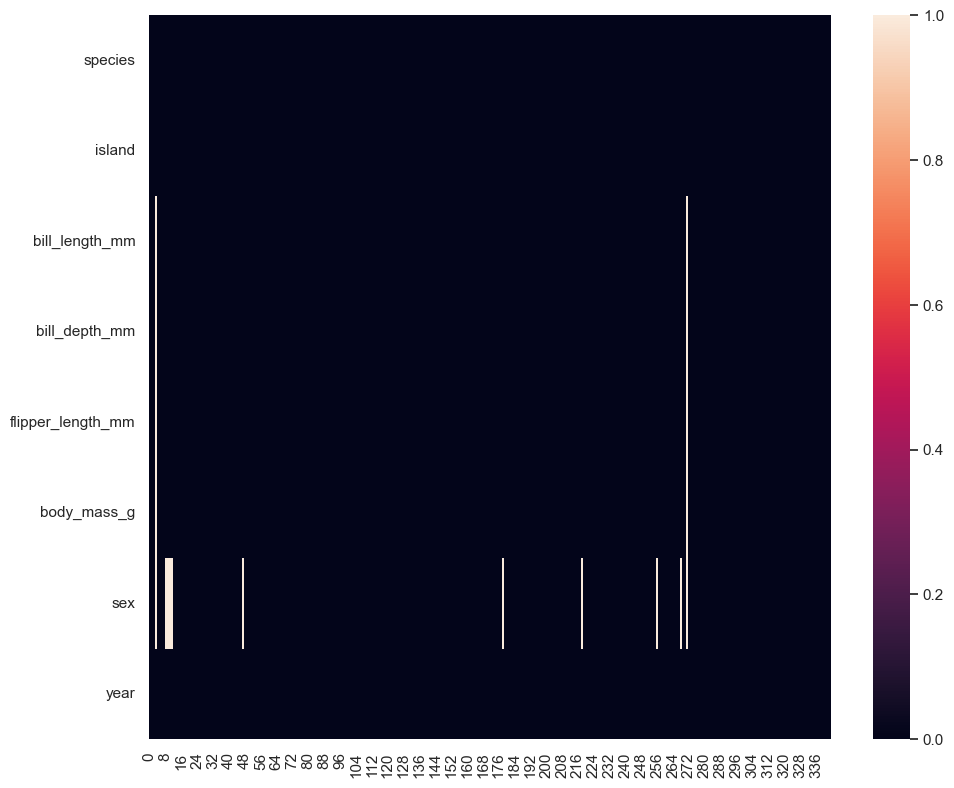

In [13]:
nul_values = preprocess_penguins_df.isnull().transpose()
sns.heatmap(data= nul_values)

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes ?

In [14]:
process_penguins_df = preprocess_penguins_df.dropna()
process_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Medidas de tendencia central 

### Media o promedio

In [15]:
process_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [16]:
np.mean(process_penguins_df.bill_depth_mm)

17.164864864864867

In [17]:
process_penguins_df[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']]

bill_depth_mm  bill_length_mm  flipper_length_mm  body_mass_g
0             18.7            39.1              181.0       3750.0
1             17.4            39.5              186.0       3800.0
2             18.0            40.3              195.0       3250.0
4             19.3            36.7              193.0       3450.0
5             20.6            39.3              190.0       3650.0
..             ...             ...                ...          ...
339           19.8            55.8              207.0       4000.0
340           18.1            43.5              202.0       3400.0
341           18.2            49.6              193.0       3775.0
342           19.0            50.8              210.0       4100.0
343           18.7            50.2              198.0       3775.0

[333 rows x 4 columns]

### Mediana

In [18]:
process_penguins_df[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']].median()

bill_depth_mm          17.3
bill_length_mm         44.5
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

### Moda

In [19]:
process_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [20]:
process_penguins_df.describe(include= object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión

### ¿Cuál es el valor máximo de las variables?

In [21]:
process_penguins_df.max(numeric_only= True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [22]:
process_penguins_df.min(numeric_only= True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cúal es el rango de las variables ? 

In [23]:
process_penguins_df.max(numeric_only= True) - process_penguins_df.min(numeric_only= True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### ¿Cuál es la desciación estandar de las variables ? 

In [24]:
process_penguins_df.std(numeric_only= True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

### ¿Cuál es el rango intercuartílico ?

In [25]:
process_penguins_df[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.75)

bill_depth_mm          18.7
bill_length_mm         48.6
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

In [26]:
process_penguins_df[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.75) - process_penguins_df[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.25)

bill_depth_mm           3.1
bill_length_mm          9.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [27]:
rango = process_penguins_df.quantile([0.75, 0.50, 0.25], numeric_only=True).transpose().rename_axis('variable').reset_index()
rango['iqr'] = rango[0.75] - rango[0.25]
rango

variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

### ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

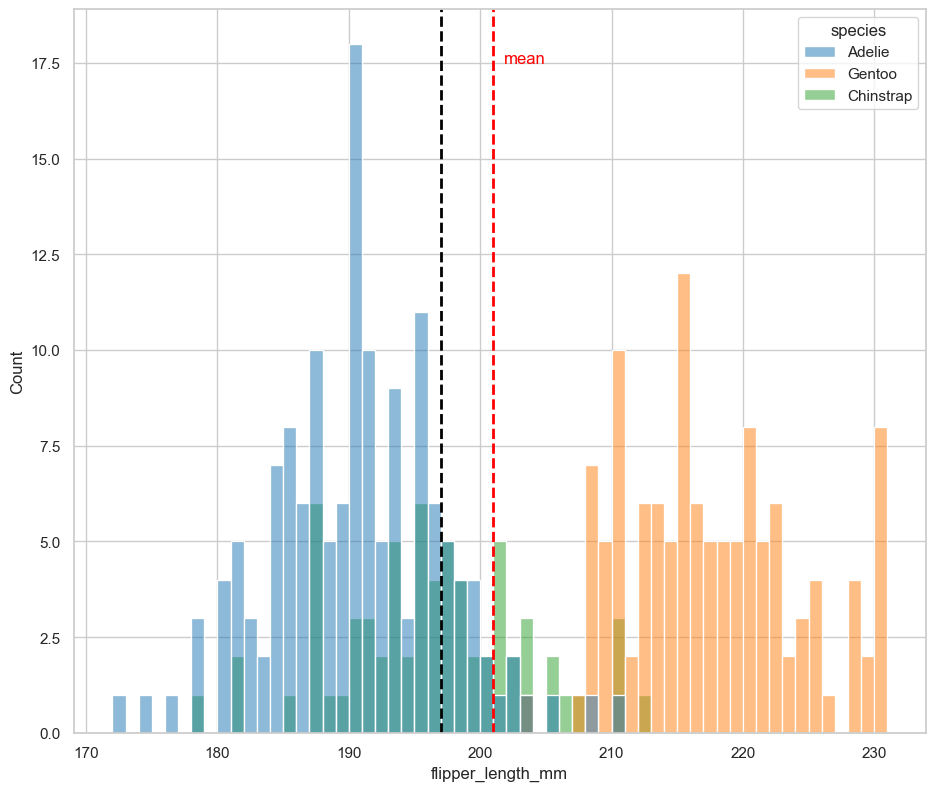

In [28]:
sns.histplot(data= process_penguins_df, 
             x = 'flipper_length_mm', hue= 'species', binwidth= 1)

plt.text(201.8,17.5, 'mean', fontsize=12, color='r')
plt.axvline(x = process_penguins_df.flipper_length_mm.mean(),
            color = 'red',
            linestyle = 'dashed', 
            linewidth = 2)
plt.axvline(x = process_penguins_df.flipper_length_mm.median(),
            color = 'black',
            linestyle = 'dashed', 
            linewidth = 2)


In [29]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [30]:
freedman_diaconis_bindwidth(process_penguins_df.flipper_length_mm)

6.636560948202412

### Diagrama de cajas boxplot

<Axes: xlabel='flipper_length_mm', ylabel='species'>

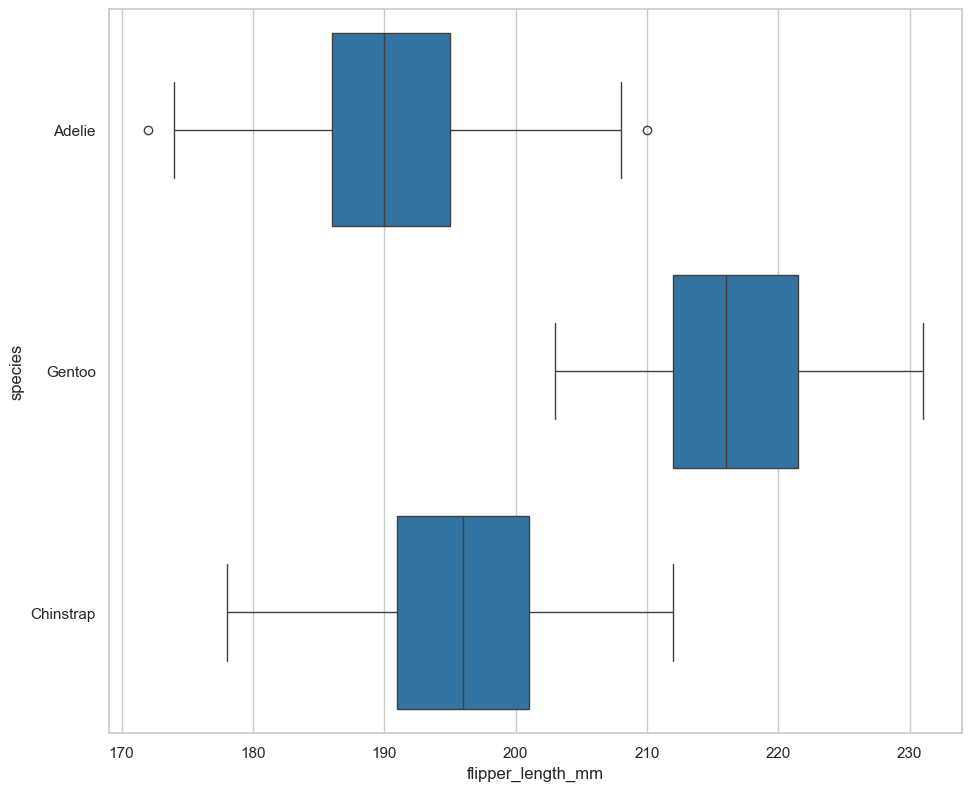

In [31]:
sns.boxplot(
    data=process_penguins_df,
    x='flipper_length_mm',
    y='species'
) 

# Distribuciones: PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

### Utilizando seaborn 

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

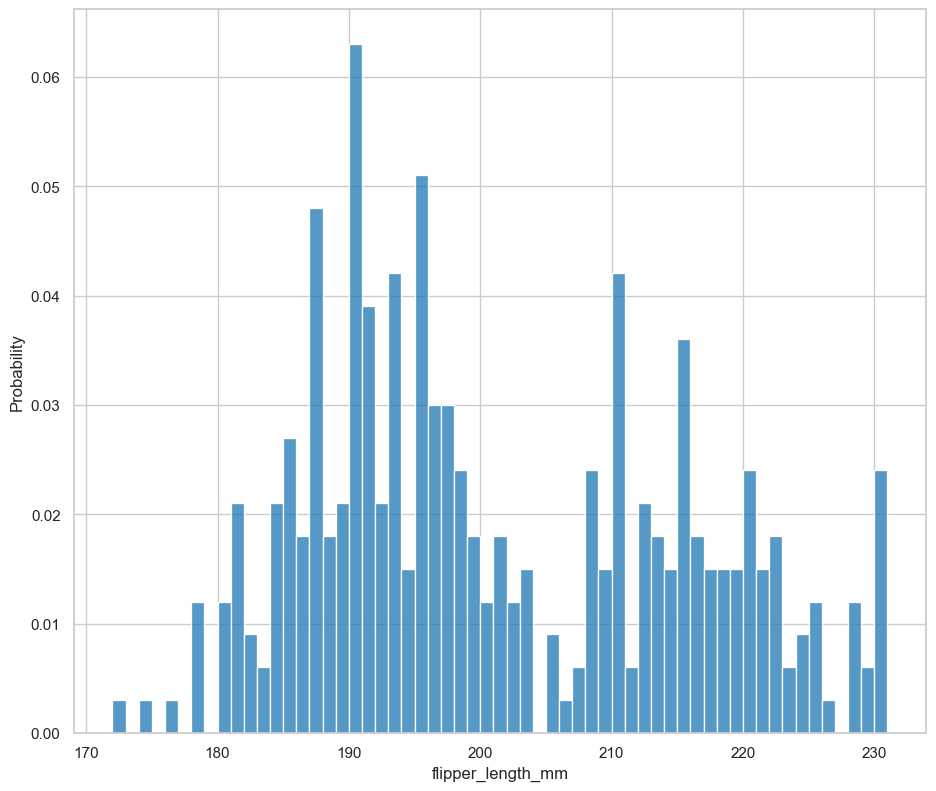

In [32]:
sns.histplot(data= process_penguins_df, x = 'flipper_length_mm', binwidth=1, stat= 'probability')

### Utilizando empriricaldist

In [33]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(process_penguins_df.flipper_length_mm, normalize=True)

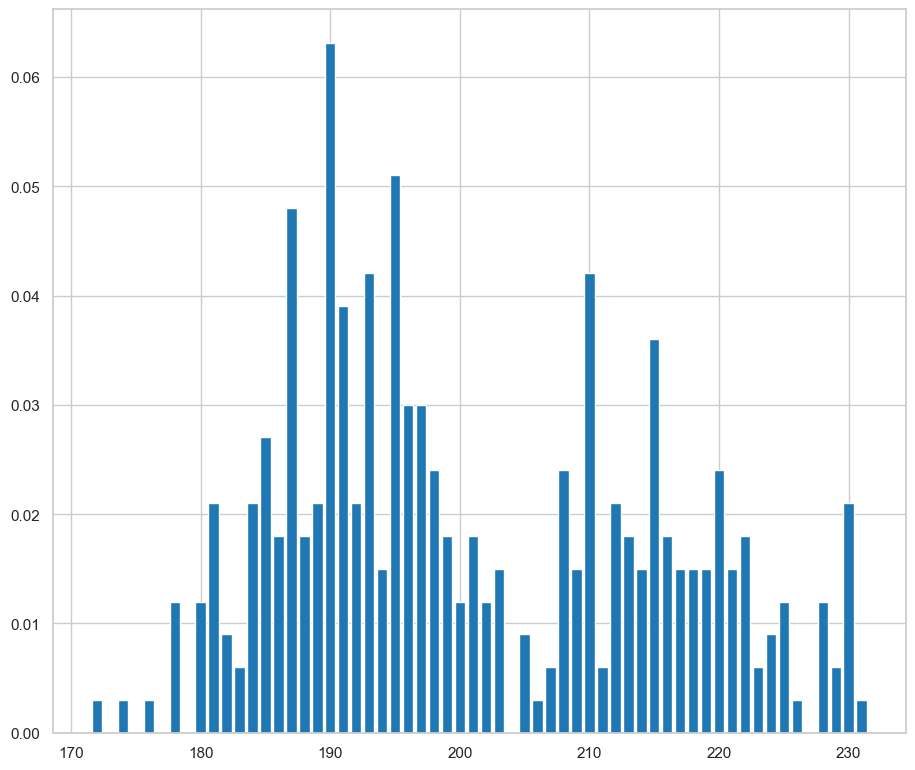

In [34]:
pmf_flipper_length_mm.bar()

In [35]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [36]:
process_penguins_df.flipper_length_mm.max()

231.0

### Funciones empíricas de probabilidad acumulada

### Utilizando seaborn 

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

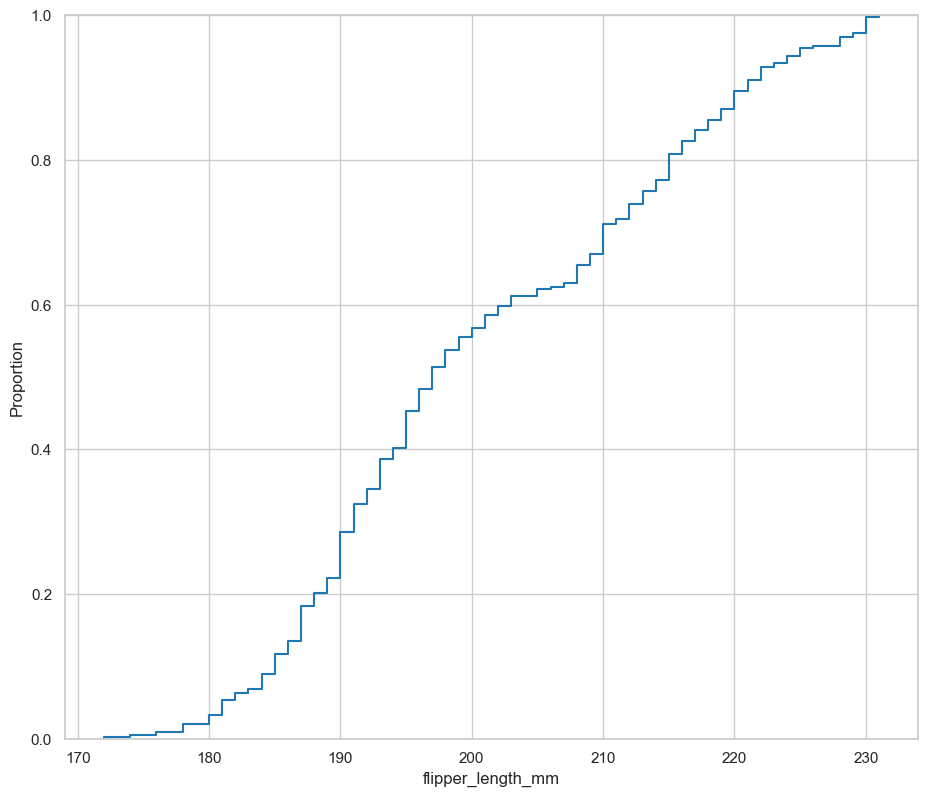

In [37]:
sns.ecdfplot(data=process_penguins_df, x= 'flipper_length_mm')

### Utilizando empiricaldist

In [38]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(process_penguins_df.flipper_length_mm, normalize=True)

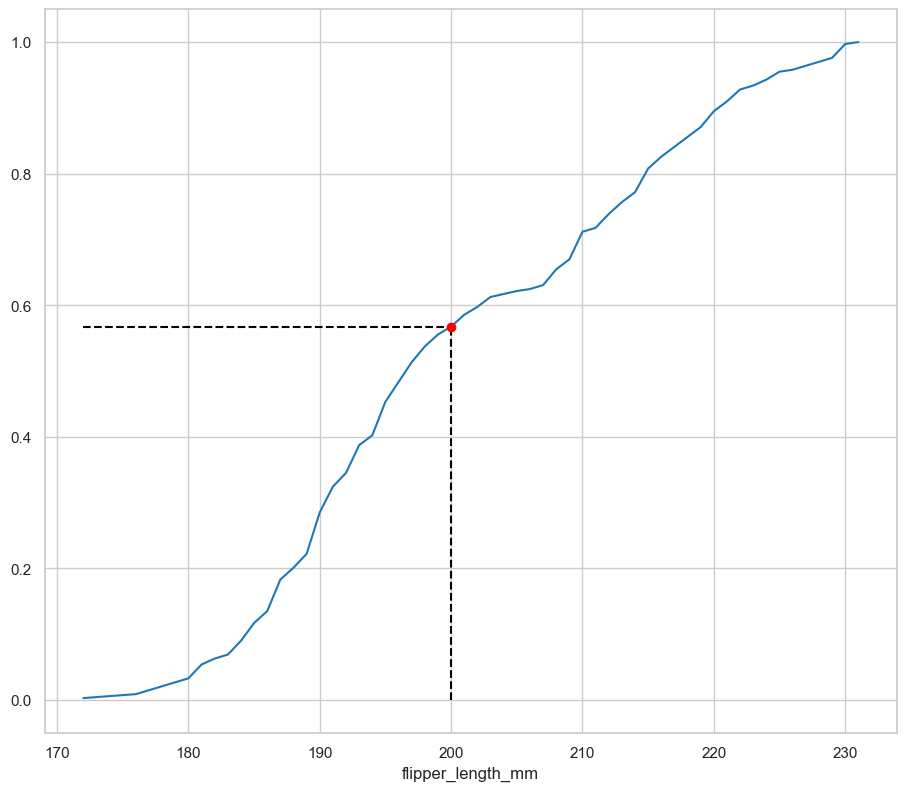

In [39]:
cdf_flipper_length_mm.plot()

q = 200

p = cdf_flipper_length_mm.forward(q)

plt.vlines(x = q, ymin=0, ymax=p, color = 'black', linestyle= 'dashed')
plt.hlines(y = p, xmin=pmf_flipper_length_mm.qs[0], xmax=q, color = 'black', linestyle= 'dashed')
plt.plot(q,p,'ro')

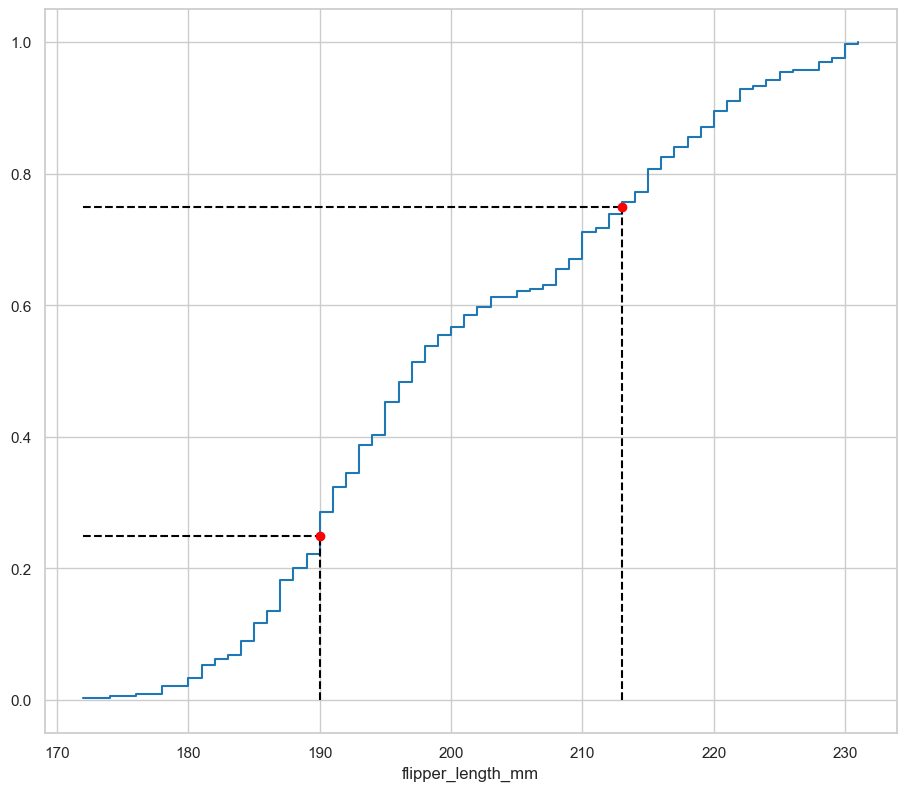

In [40]:
cdf_flipper_length_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

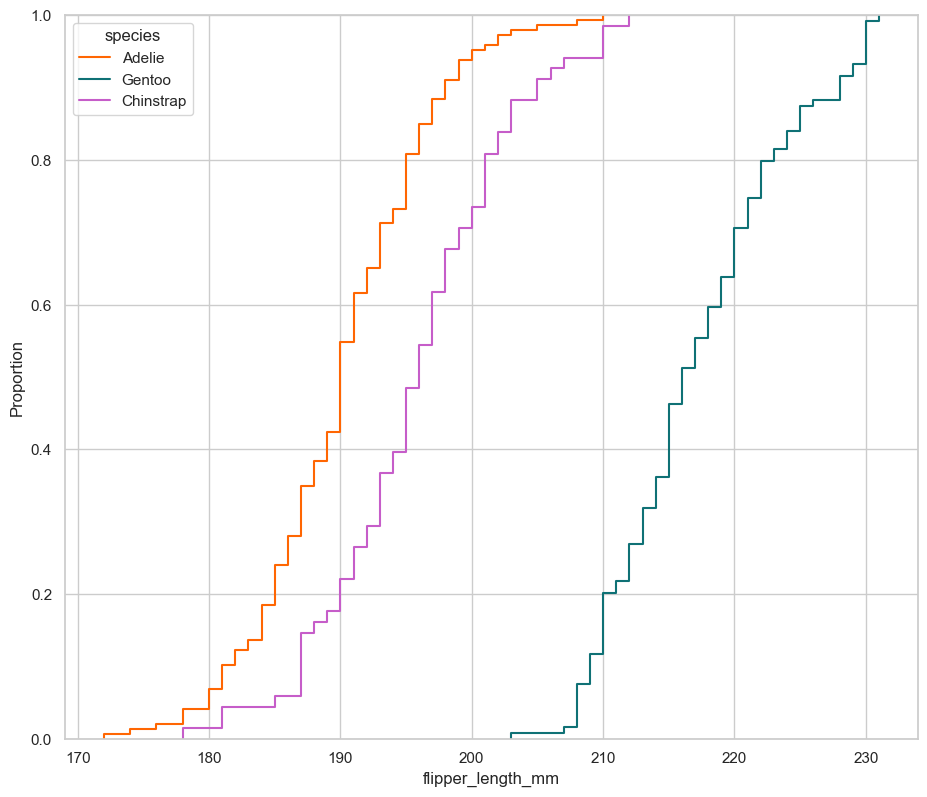

In [41]:
sns.ecdfplot(data=process_penguins_df, x = 'flipper_length_mm',hue='species', palette= penguin_color)

### Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

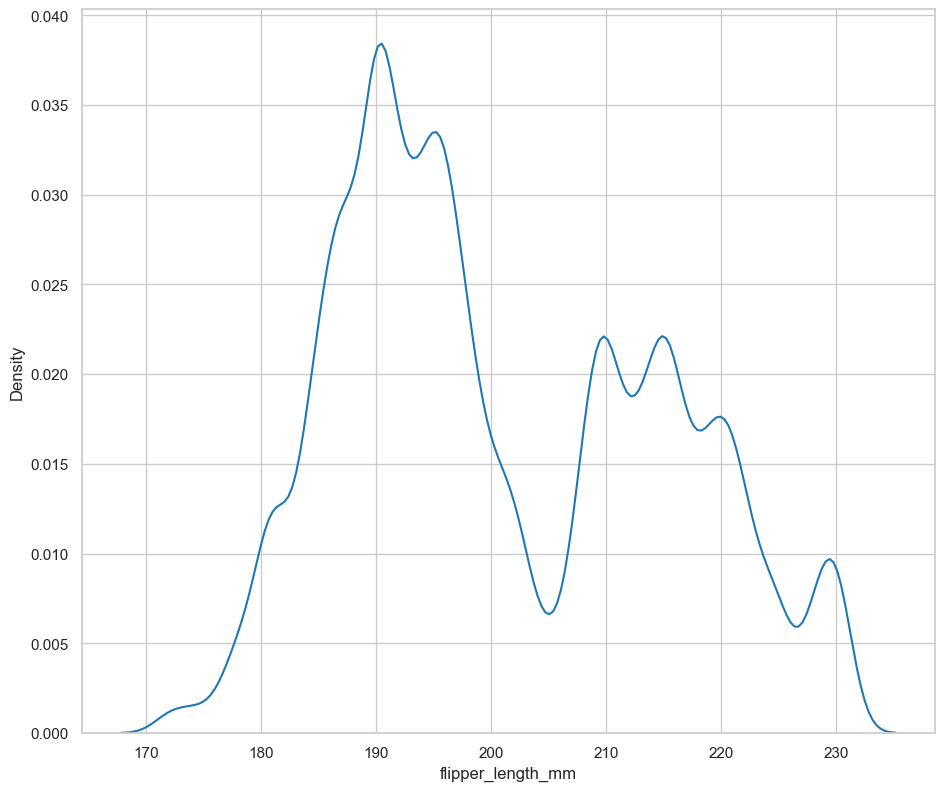

In [42]:
sns.kdeplot(data= process_penguins_df, x = 'flipper_length_mm', bw_method=0.1)

In [43]:
stats = process_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

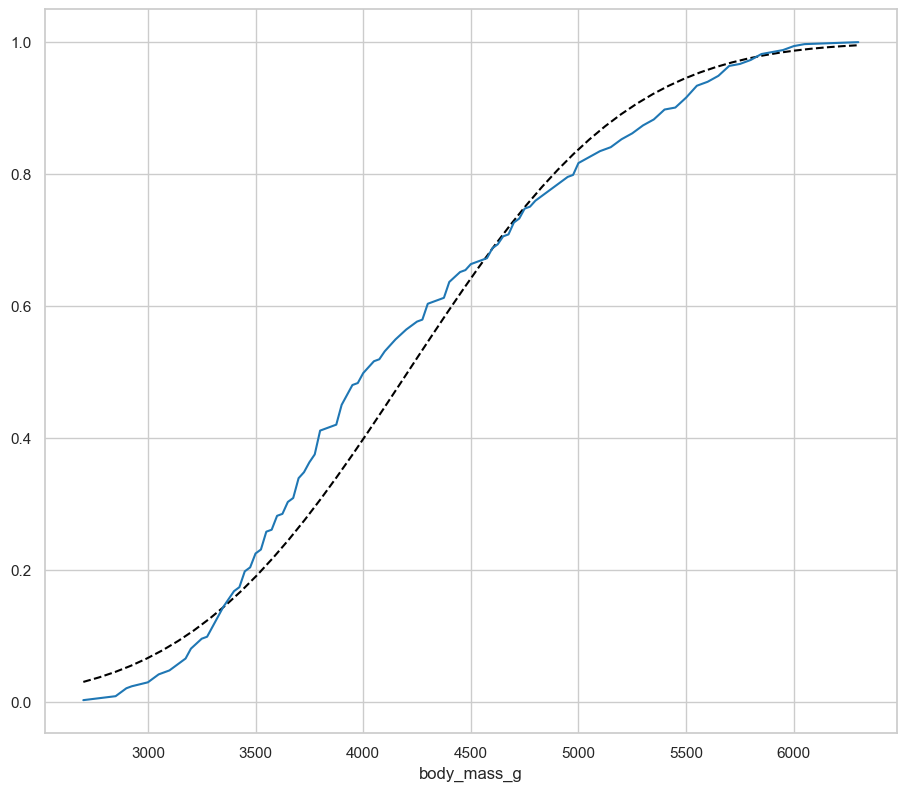

In [44]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std'] ).cdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

empiricaldist.Cdf.from_seq(process_penguins_df.body_mass_g, normalize=True).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

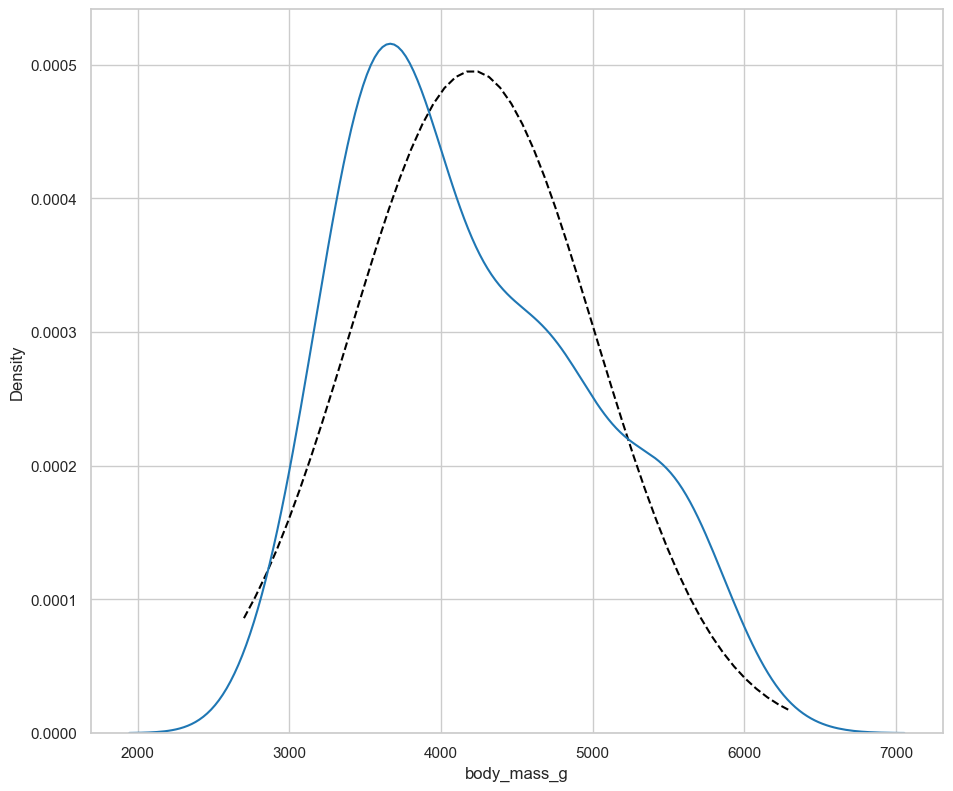

In [45]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std'] ).pdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

sns.kdeplot(data = process_penguins_df, x ='body_mass_g')

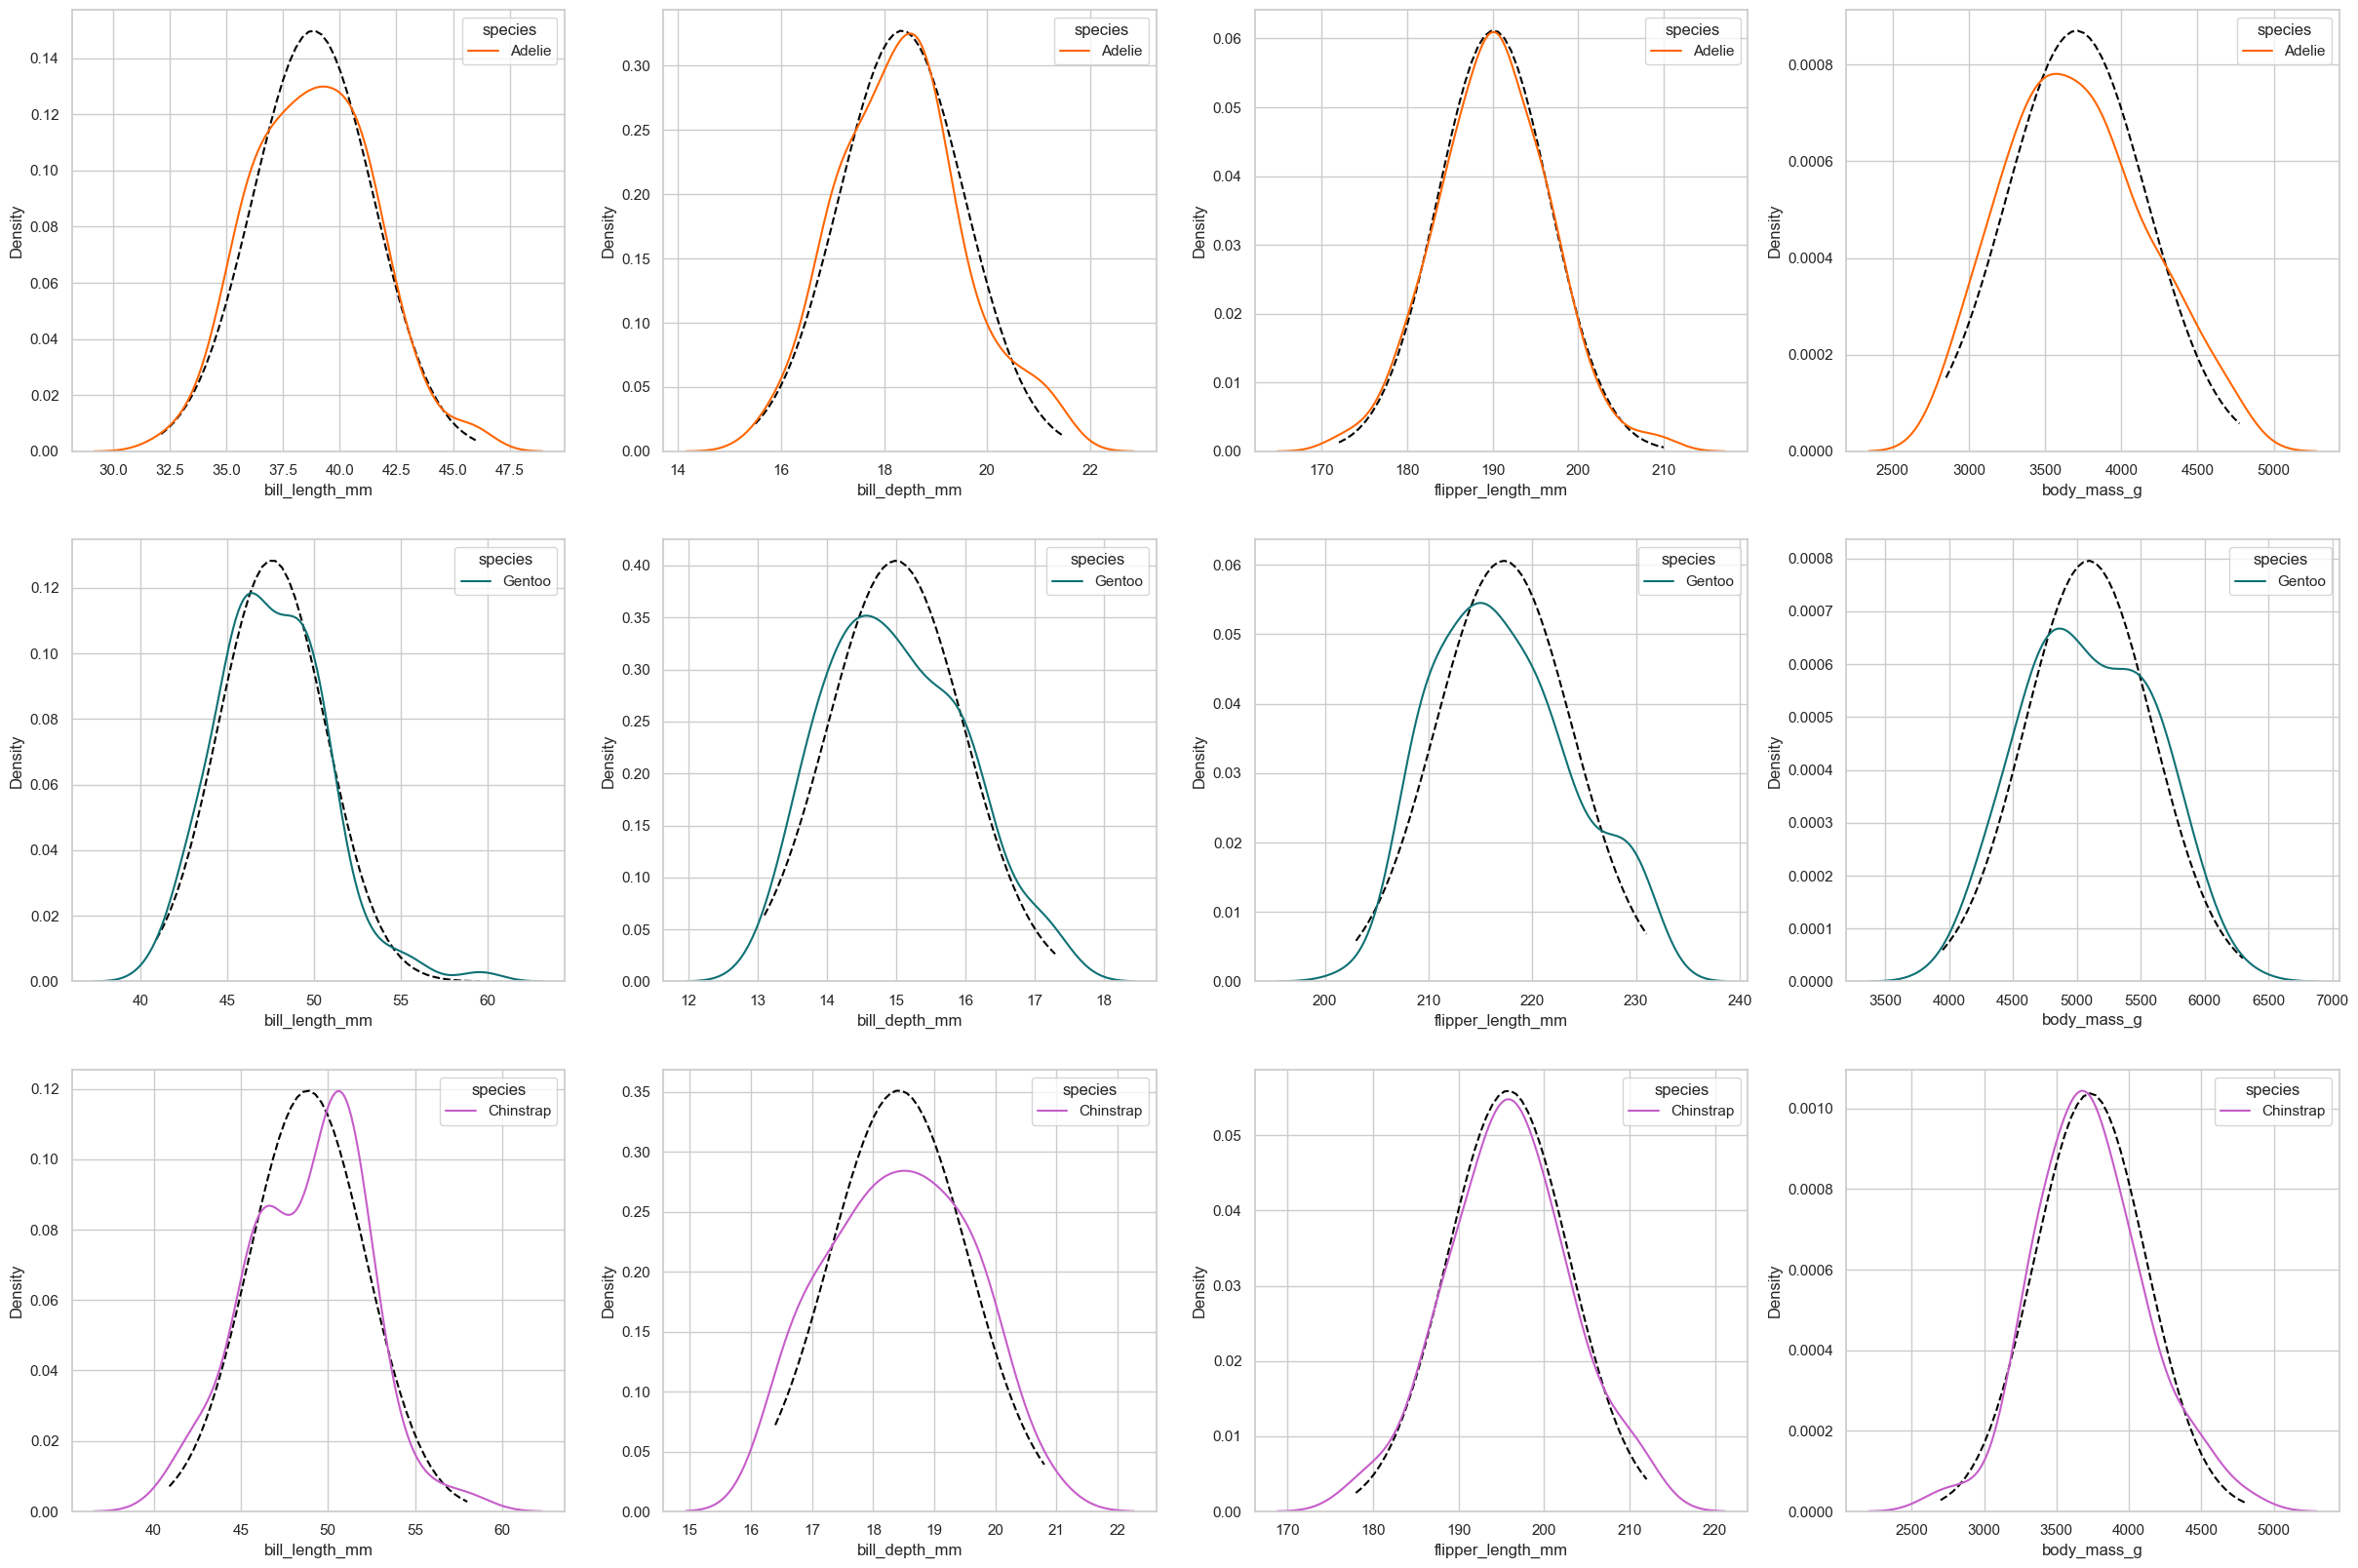

In [46]:
adelie = process_penguins_df[process_penguins_df.species == 'Adelie']
gentoo = process_penguins_df[process_penguins_df.species == 'Gentoo']
chinstrap = process_penguins_df[process_penguins_df.species == 'Chinstrap']
specie = [adelie, gentoo, chinstrap]
numeric_colums = process_penguins_df.select_dtypes(include= np.number).columns
numeric_columns = numeric_colums.drop('year')

fig, ax = plt.subplots(3,4,figsize=(30,20))
for i, i_col in enumerate(specie):
    for j , j_col in enumerate(numeric_columns):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'],stats['max']) 
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs,ys, color='black',linestyle='--')

        sns.kdeplot(
            ax = ax[i][j],
            data = i_col,
            x=j_col,
            hue='species',
            palette=penguin_color
        ) 



### Ley de los Grandes Números y Teorema del Límite Central 

### Ley de los Grandes Números 

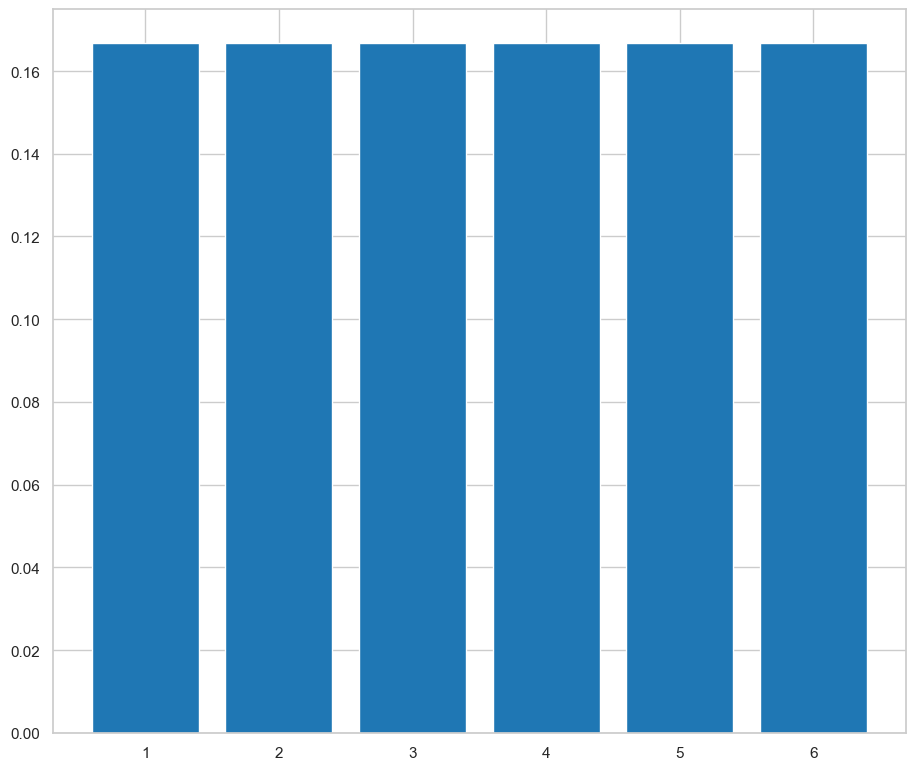

In [47]:
dado = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dado.bar()

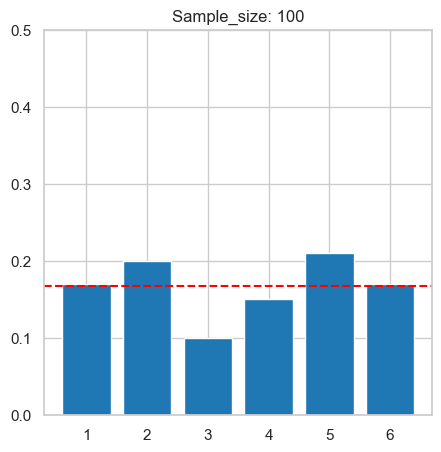

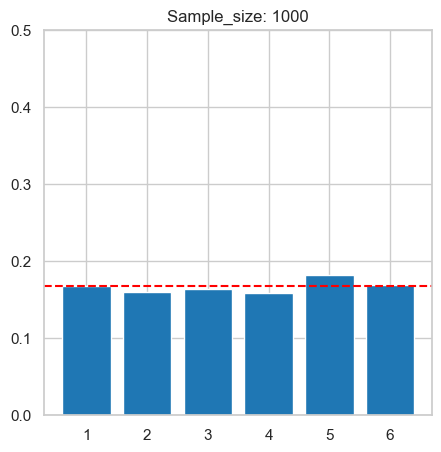

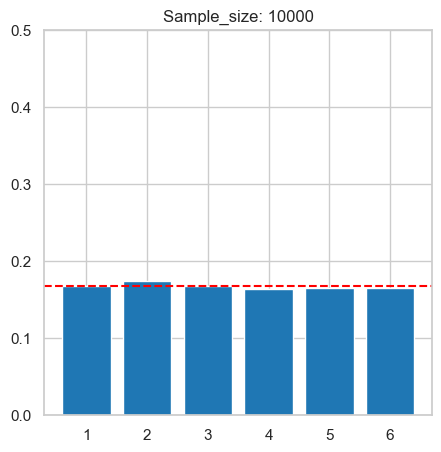

In [48]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dado.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize= (5,5))
    sample_pmf.bar()
    plt.axhline(y = 1/6 , color = 'r', linestyle = 'dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample_size: {sample_size}")



# Teorema del Límite Central 

In [49]:
process_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

In [50]:
sex_numeric = process_penguins_df.sex.replace(['male', 'female'], [1, 0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [51]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

samples_list = []
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    samples_list.append(sex_numeric_sample)

samples_df = pd.DataFrame(np.column_stack(samples_list), columns=[f"sample_{i}" for i in range(1, number_samples + 1)])

male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 50.1829%


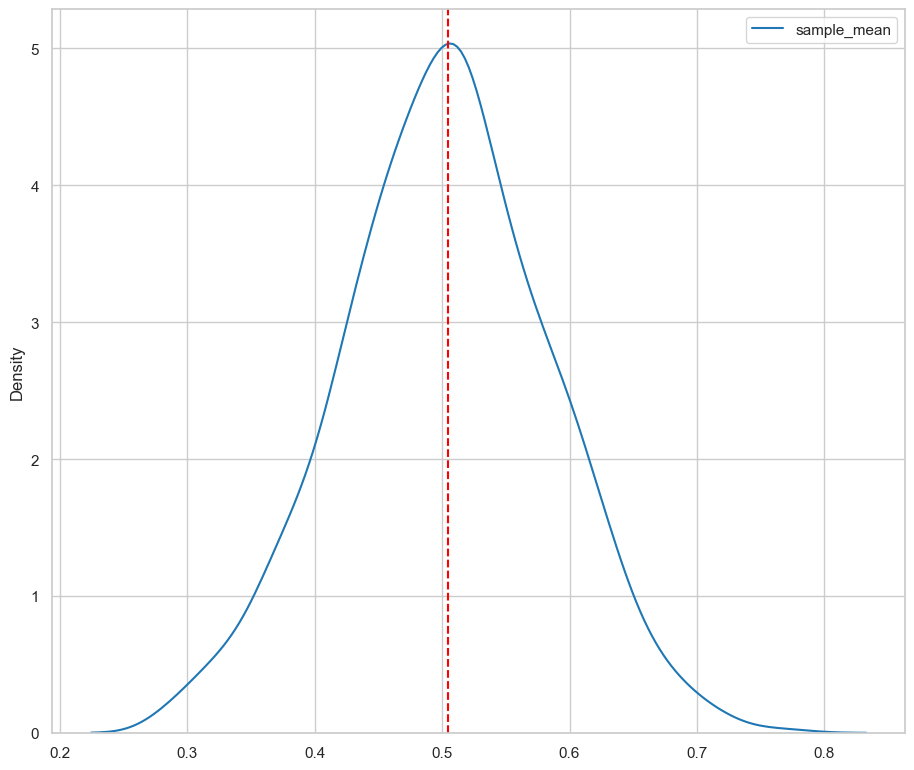

In [52]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [53]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

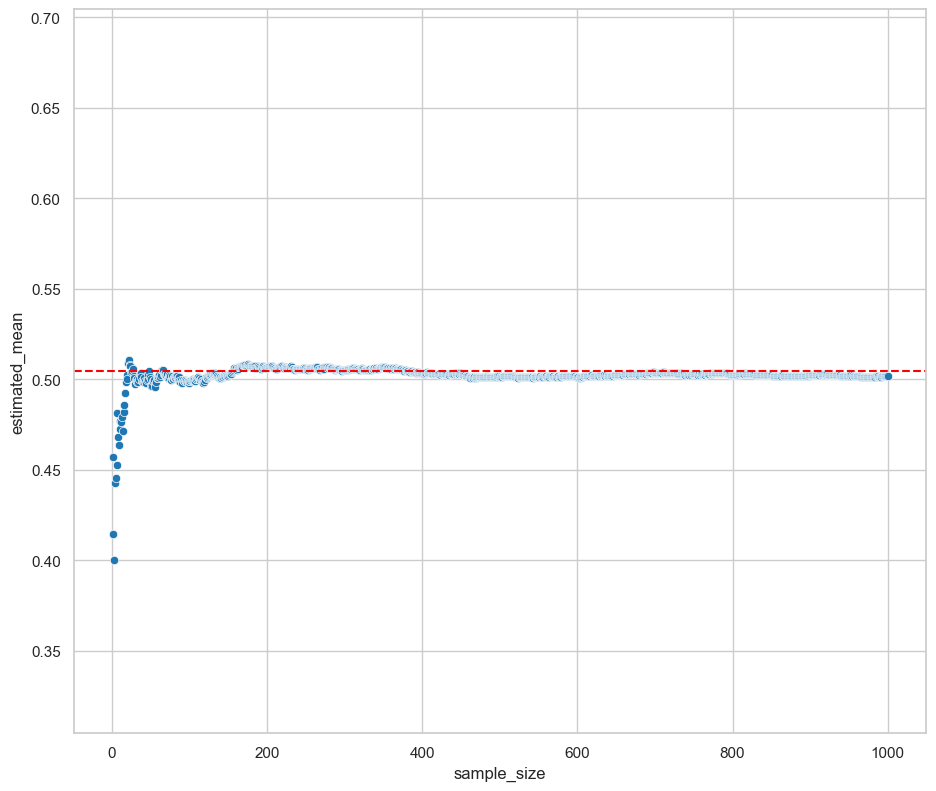

In [54]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

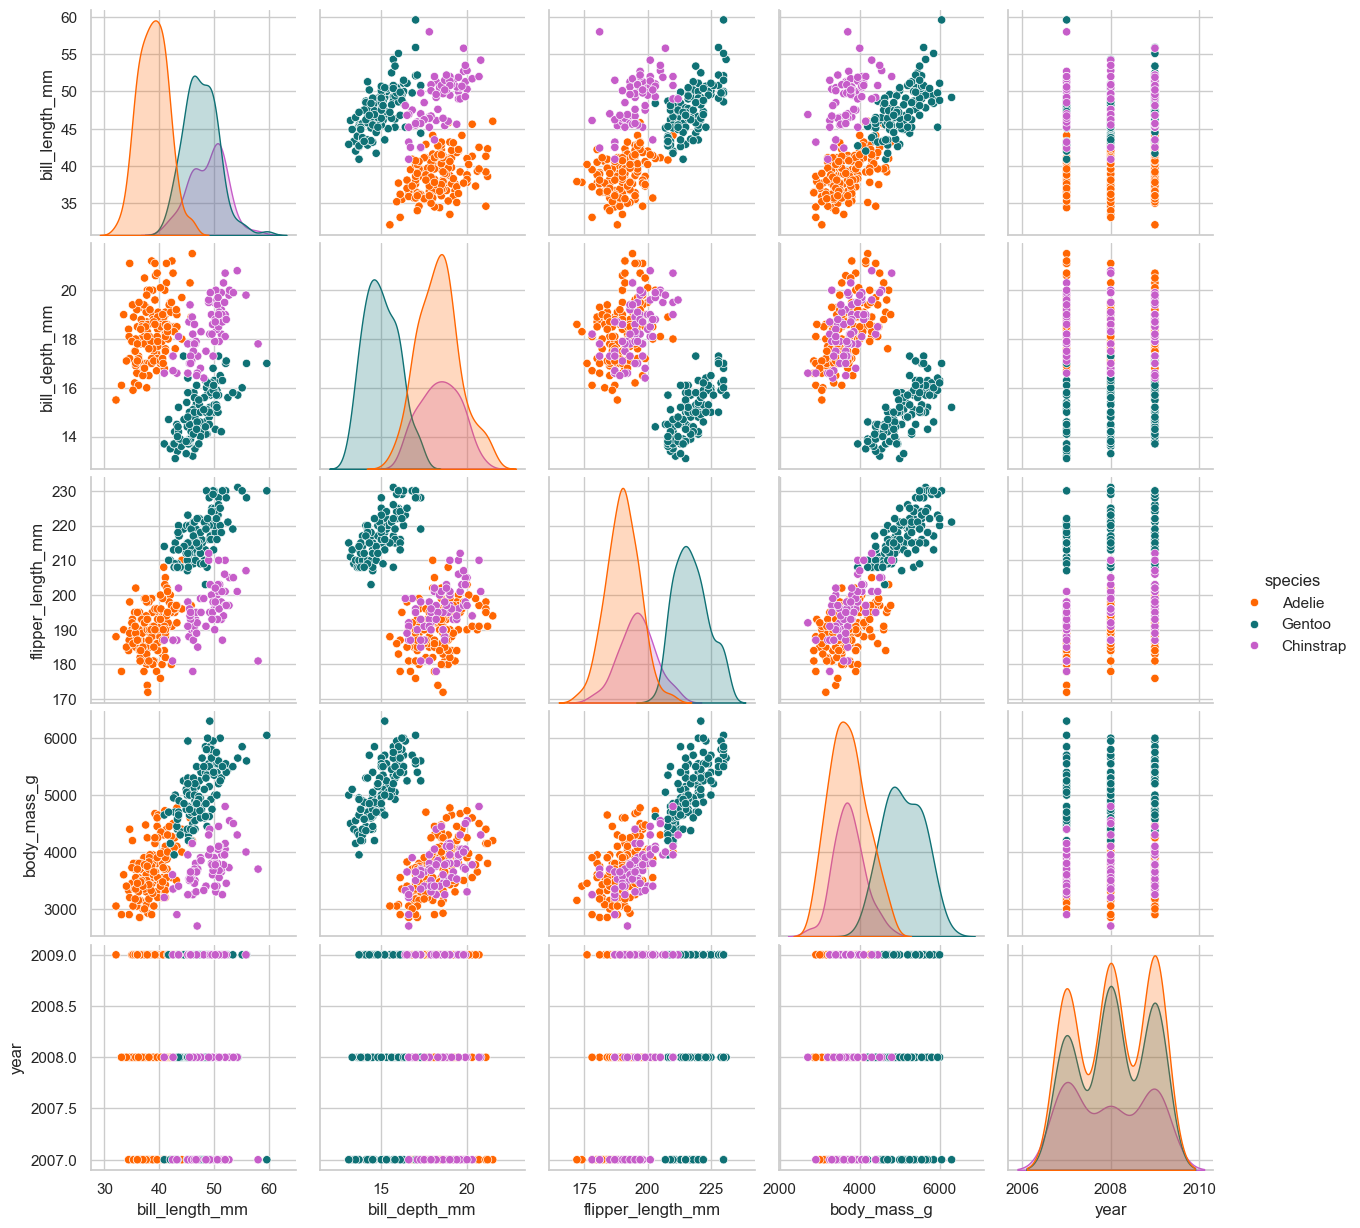

In [55]:
sns.pairplot(data=process_penguins_df, palette=penguin_color, hue='species')

### Estableciendo las relaciones: Gráficas de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

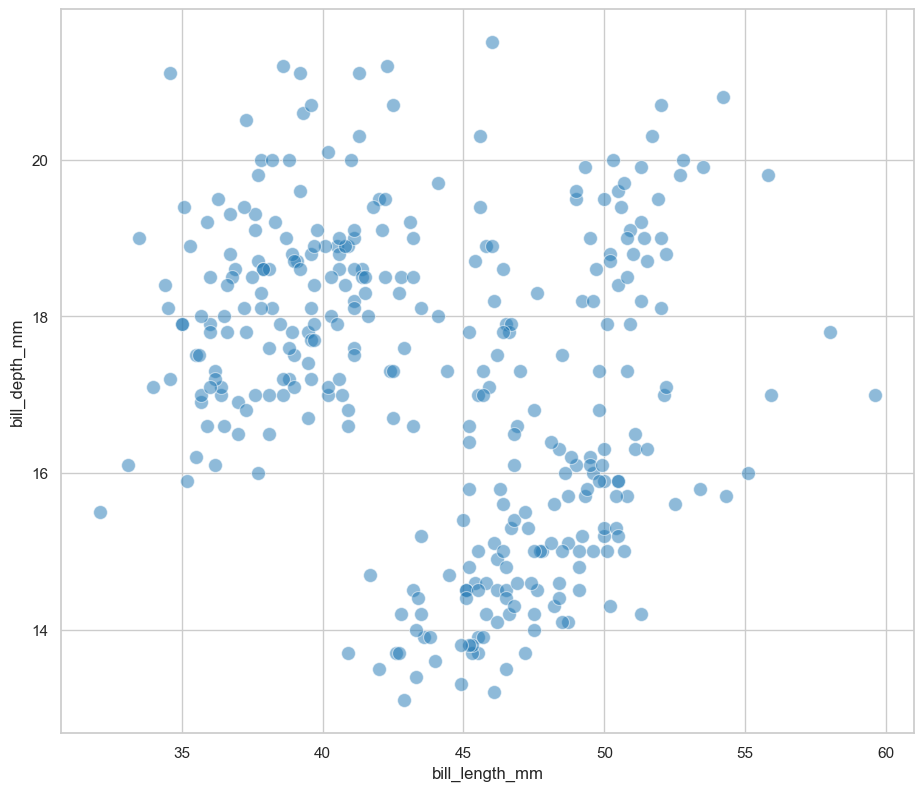

In [56]:
sns.scatterplot(data= process_penguins_df, x = 'bill_length_mm', y='bill_depth_mm', alpha = 1/2, s = 100)

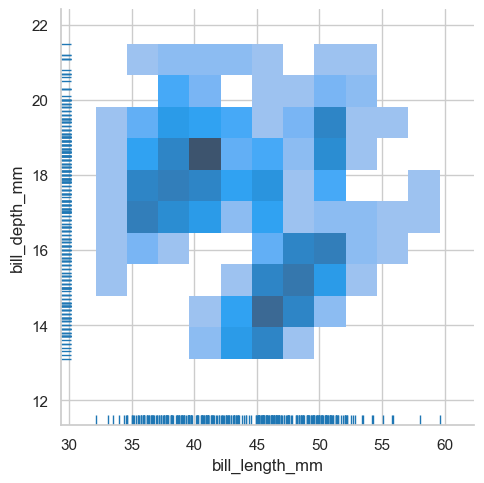

In [57]:
sns.displot(data= process_penguins_df, x = 'bill_length_mm', y='bill_depth_mm', rug = True)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

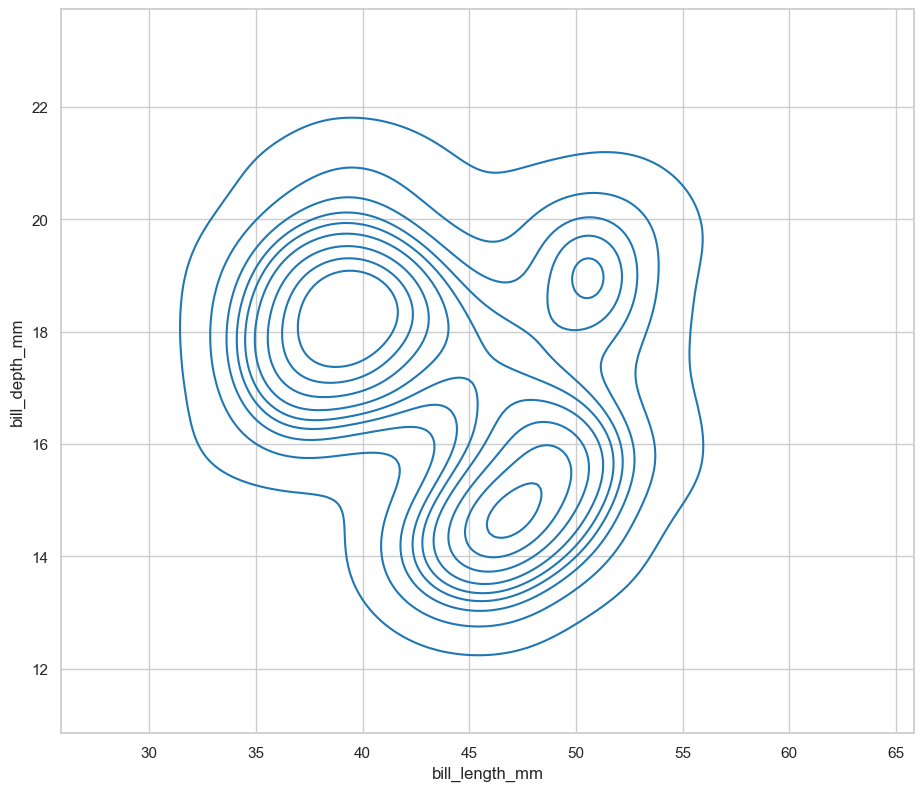

In [58]:
sns.kdeplot(data= process_penguins_df, x = 'bill_length_mm', y='bill_depth_mm')

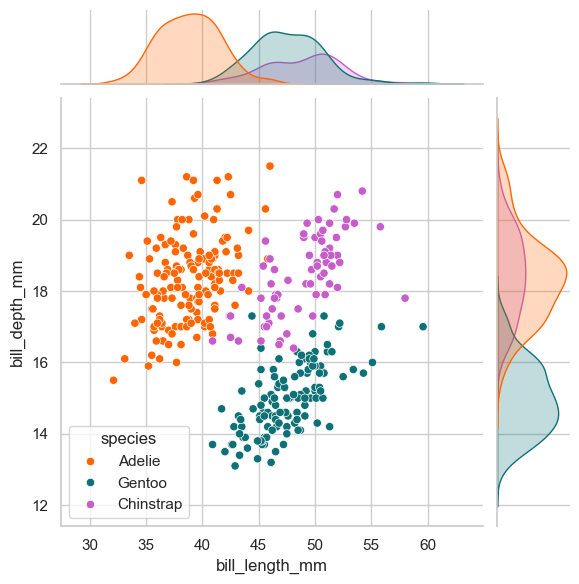

In [59]:
sns.jointplot(data= process_penguins_df, x = 'bill_length_mm', y='bill_depth_mm', palette=penguin_color, hue='species')

### Estableciendo relaciones: Gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

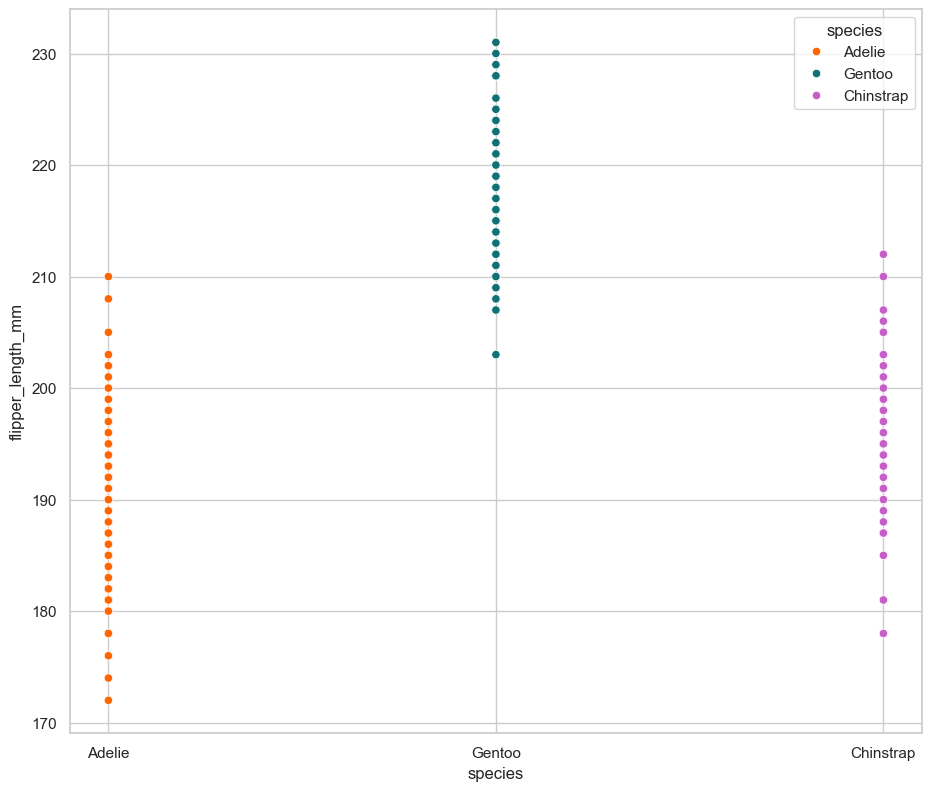

In [60]:
sns.scatterplot(data= process_penguins_df, x = 'species', y='flipper_length_mm', hue='species', palette=penguin_color)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

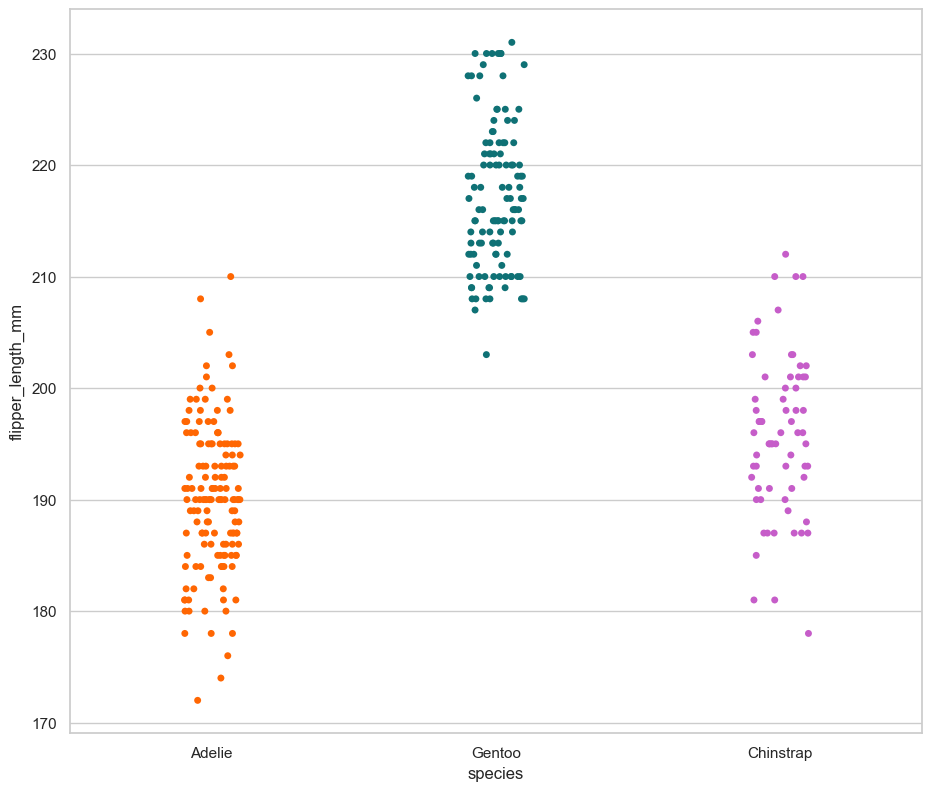

In [61]:
sns.stripplot(data= process_penguins_df, x = 'species', y='flipper_length_mm', hue='species', palette=penguin_color)

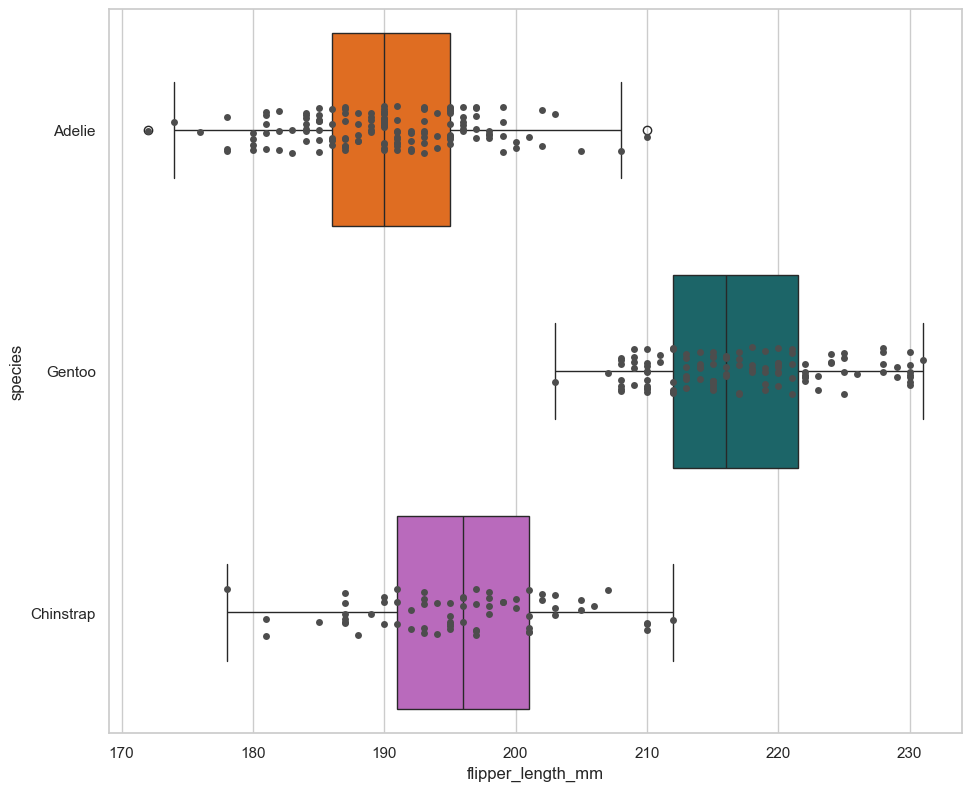

In [62]:
ax = sns.boxplot(data= process_penguins_df, y = 'species', x='flipper_length_mm', hue='species', palette=penguin_color)

ax = sns.stripplot(data=process_penguins_df,y = 'species', x='flipper_length_mm', color= '.3')

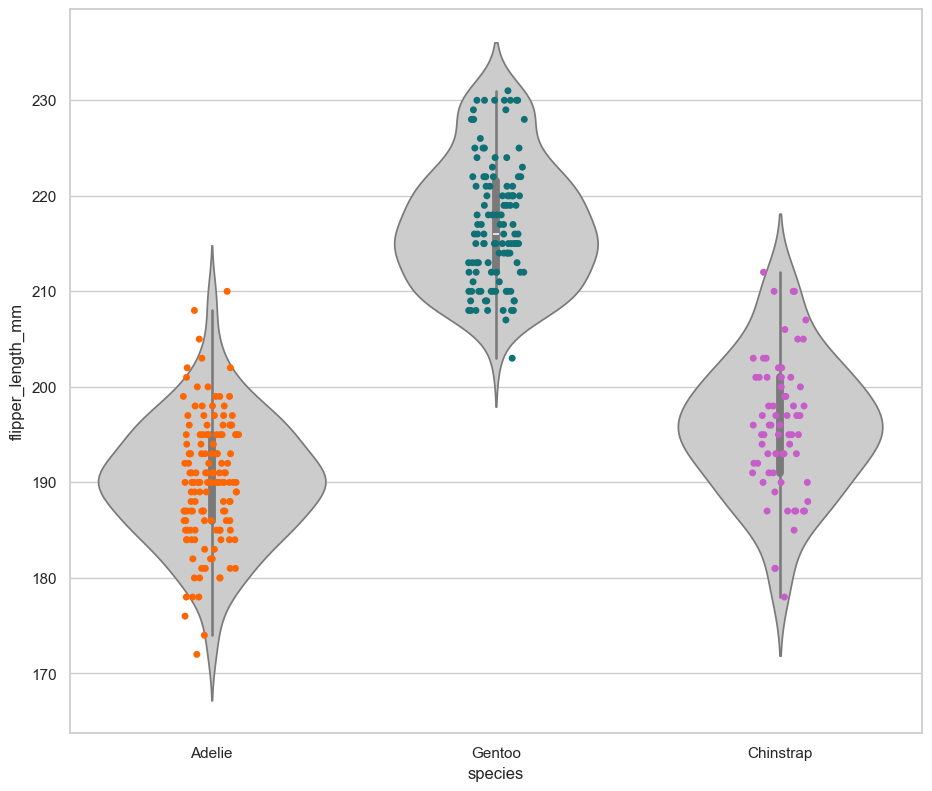

In [63]:
ax = sns.violinplot(data= process_penguins_df, x = 'species', y='flipper_length_mm', color='.8')

ax = sns.stripplot(data=process_penguins_df, x = 'species', y = 'flipper_length_mm', palette= penguin_color, hue='species')

<Axes: xlabel='species', ylabel='flipper_length_mm'>

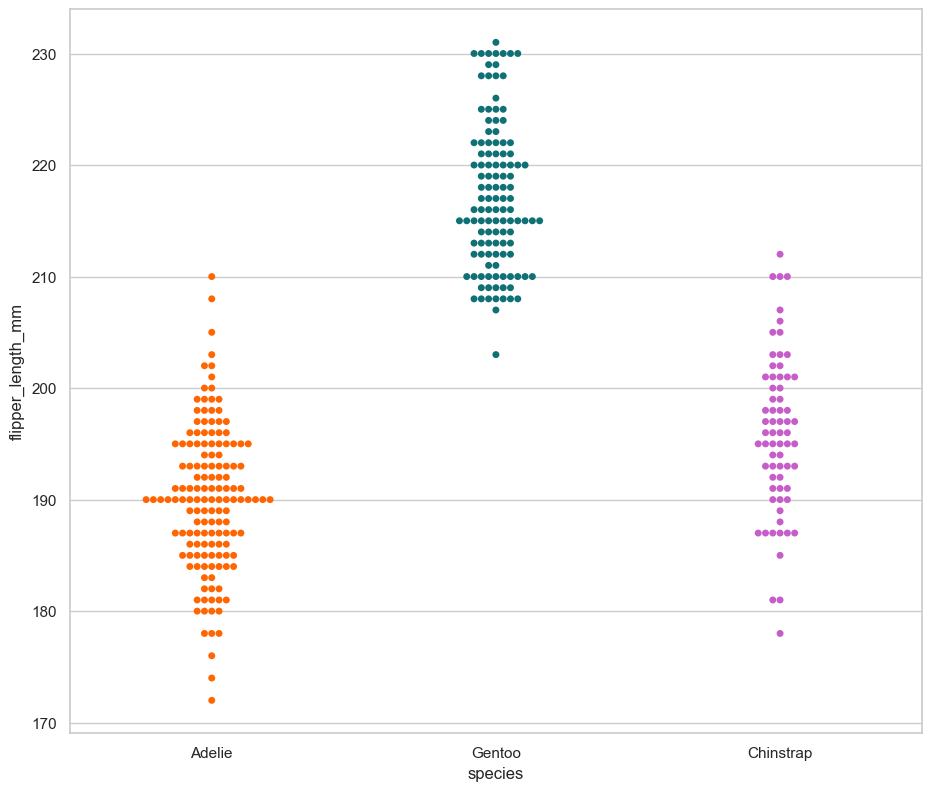

In [64]:
sns.swarmplot(data= process_penguins_df, x = 'species', y='flipper_length_mm', hue='species', palette=penguin_color)

# Estableciendo matrices de correlación

### ¿Existe una Correlación lineal entre alguna de nuestras variables?

In [65]:
process_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

### ¿Cómo puedo visualizar los coeficientes de correlación?

<Axes: >

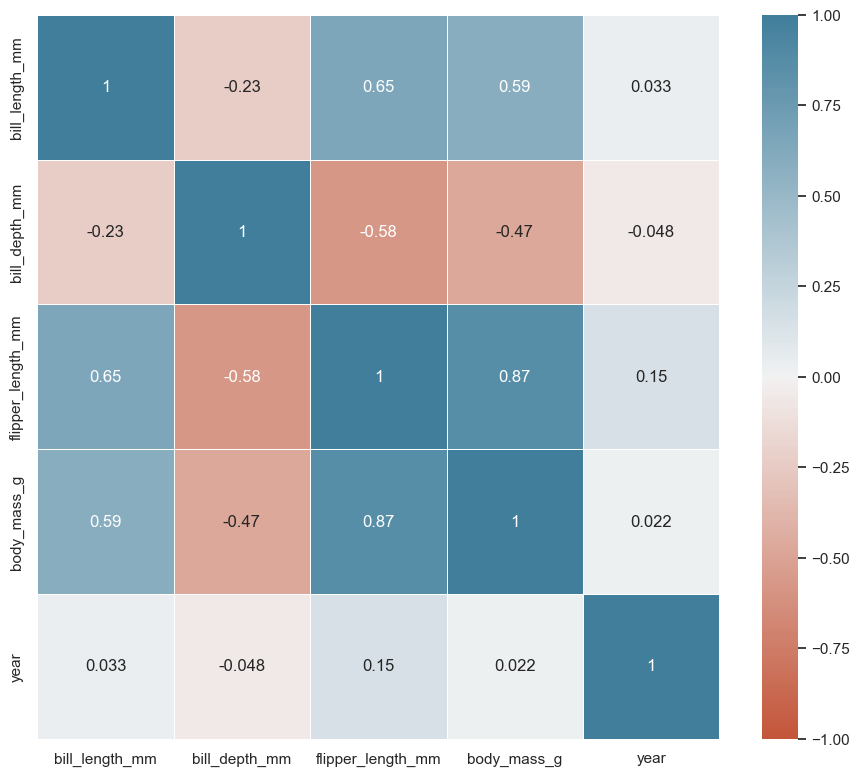

In [66]:
sns.heatmap(data=process_penguins_df.corr(numeric_only=True), cmap= sns.diverging_palette(20, 230, as_cmap=True),center=0, vmin=-1, vmax=1, annot=True, linewidths=0.5)

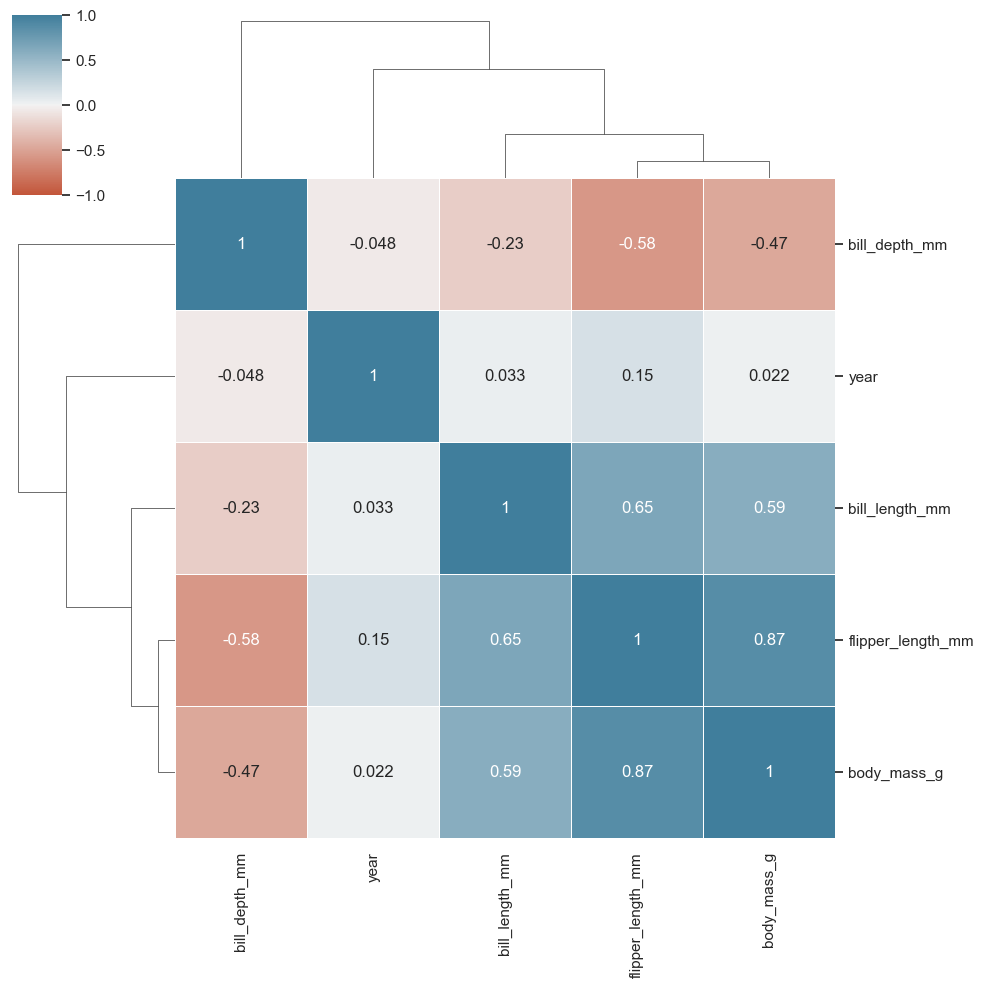

In [67]:
sns.clustermap(data=process_penguins_df.corr(numeric_only=True), cmap= sns.diverging_palette(20, 230, as_cmap=True),center=0, vmin=-1, vmax=1, annot=True, linewidths=0.5)

### ¿Cómo podría representar una variable cátegorica como una variable númerica discreta?

C:\Users\Ramiro\AppData\Local\Temp\ipykernel_19172\2261699044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_penguins_df.loc[:, 'numeric_Sex'] = process_penguins_df['sex'].map({'female': 0, 'male': 1})


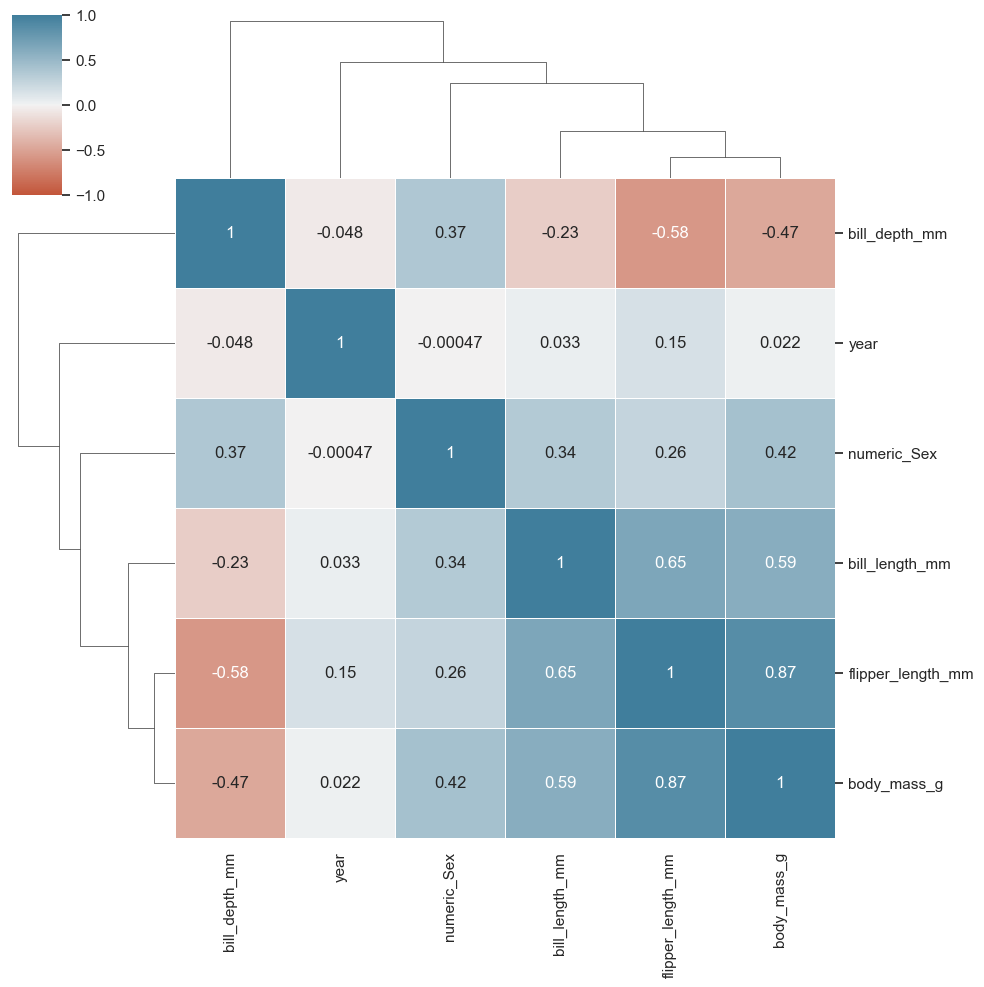

In [68]:
process_penguins_df.loc[:, 'numeric_Sex'] = process_penguins_df['sex'].map({'female': 0, 'male': 1})
sns.clustermap(data=process_penguins_df.corr(numeric_only=True), cmap= sns.diverging_palette(20, 230, as_cmap=True),center=0, vmin=-1, vmax=1, annot=True, linewidths=0.5)

# ¿Cuáles son algunas  limitantes de los coeficientes de correlación lineal  ?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal sin embargo, ausencia no significa que no haya otro tipo de correlación 

array([[1.        , 0.91657553],
       [0.91657553, 1.        ]])

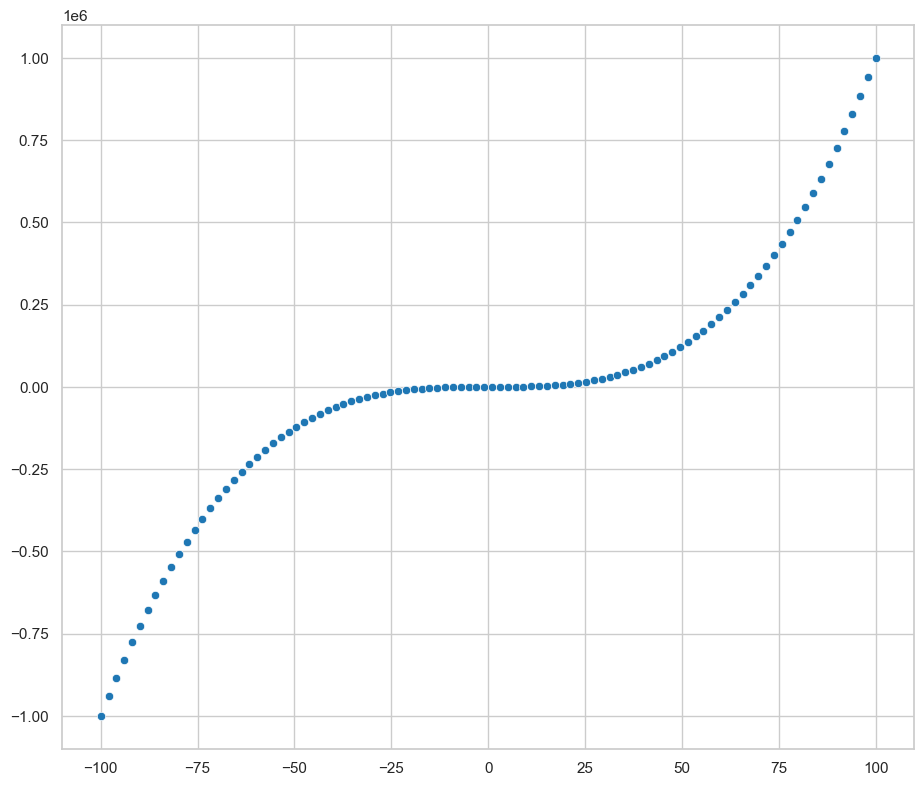

In [69]:
x = np.linspace(-100,100,100)
y = x**3

y += np.random.normal(0, 100, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

### El coeficiente de correlación no nos habla del impacto de la relación 

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


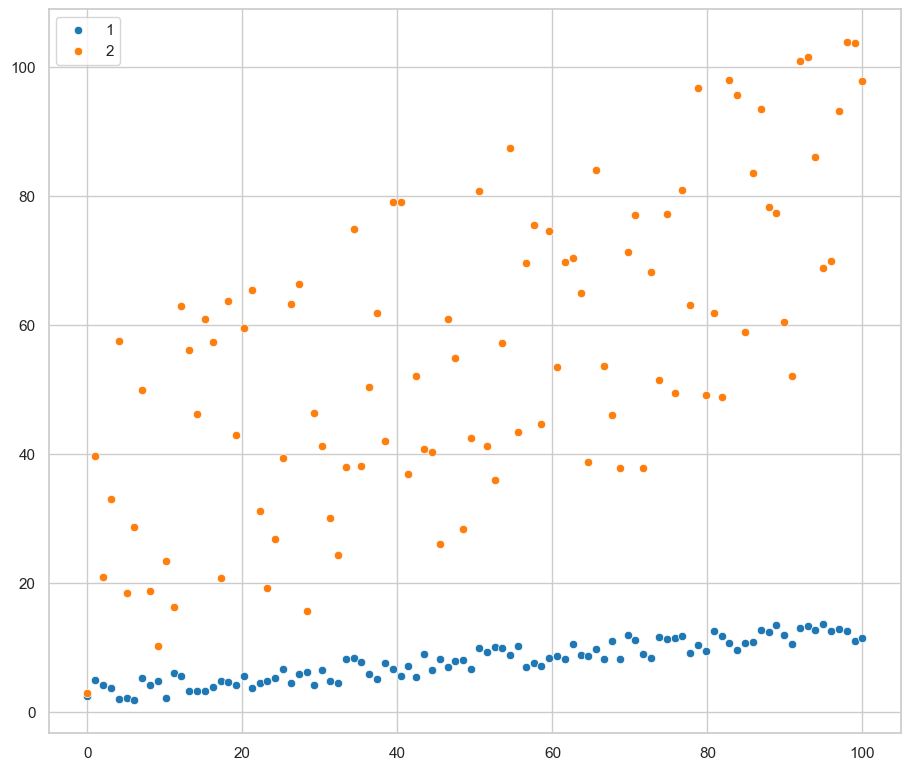

In [70]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

### Estableciendo relaciones: Análisis de rergesiones simples 

In [71]:
res_1 = scipy.stats.linregress(x = x1, y= y1)
res_2 = scipy.stats.linregress(x = x2, y= y2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


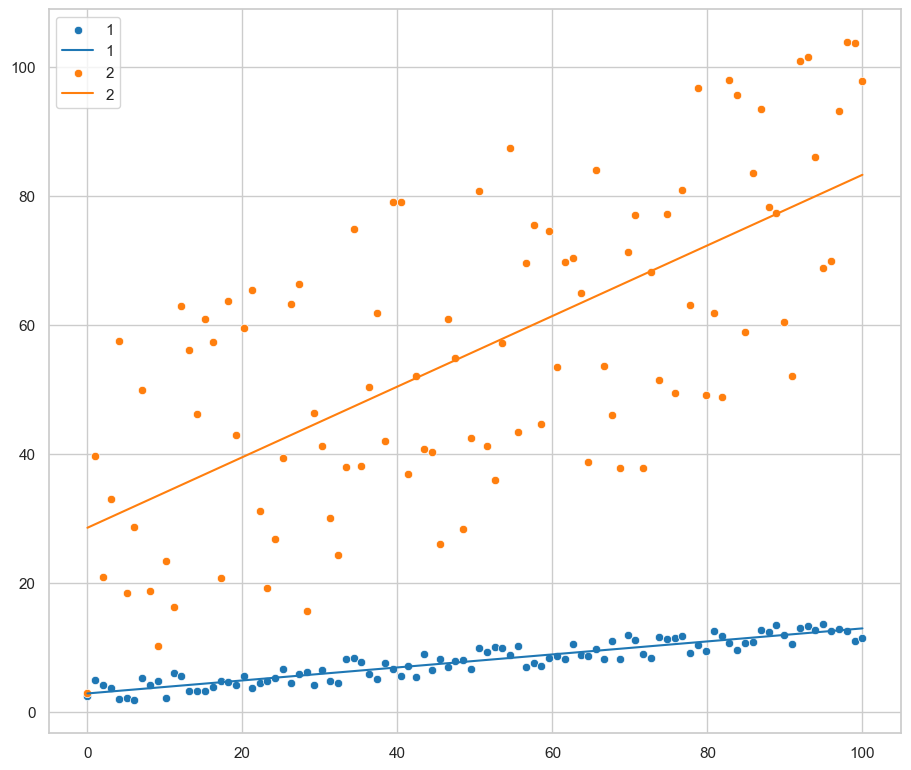

In [72]:
sns.scatterplot(
    x = x1,
    y= y1
)

fx_1 = np.array([x1.min(), x1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x= x2,
    y= y2
)

fx_2 = np.array([x2.min(), x2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


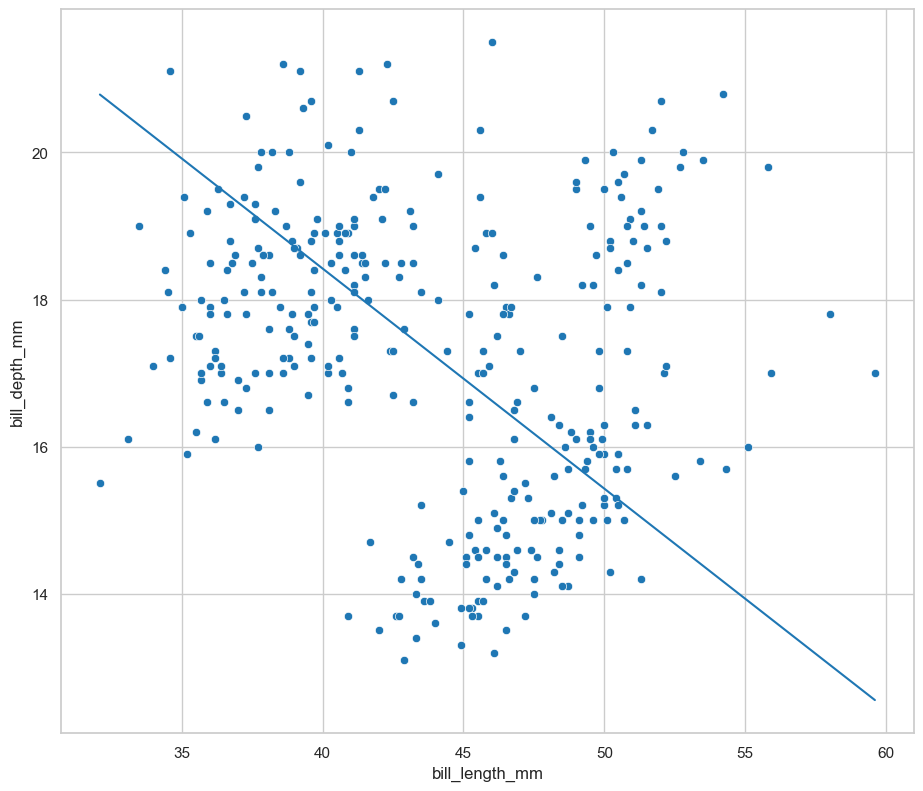

In [73]:
sns.scatterplot(
    data=process_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm', 
)

res_peguins = scipy.stats.linregress(x = process_penguins_df.bill_length_mm,
                                     y = process_penguins_df.bill_depth_mm)

print(res_peguins)

fx_1 = np.array([process_penguins_df.bill_length_mm.min(), process_penguins_df.bill_length_mm.max()])
fy_1 = res_peguins.intercept + res_peguins.slope * fx_2

plt.plot(fx_1, fy_1)

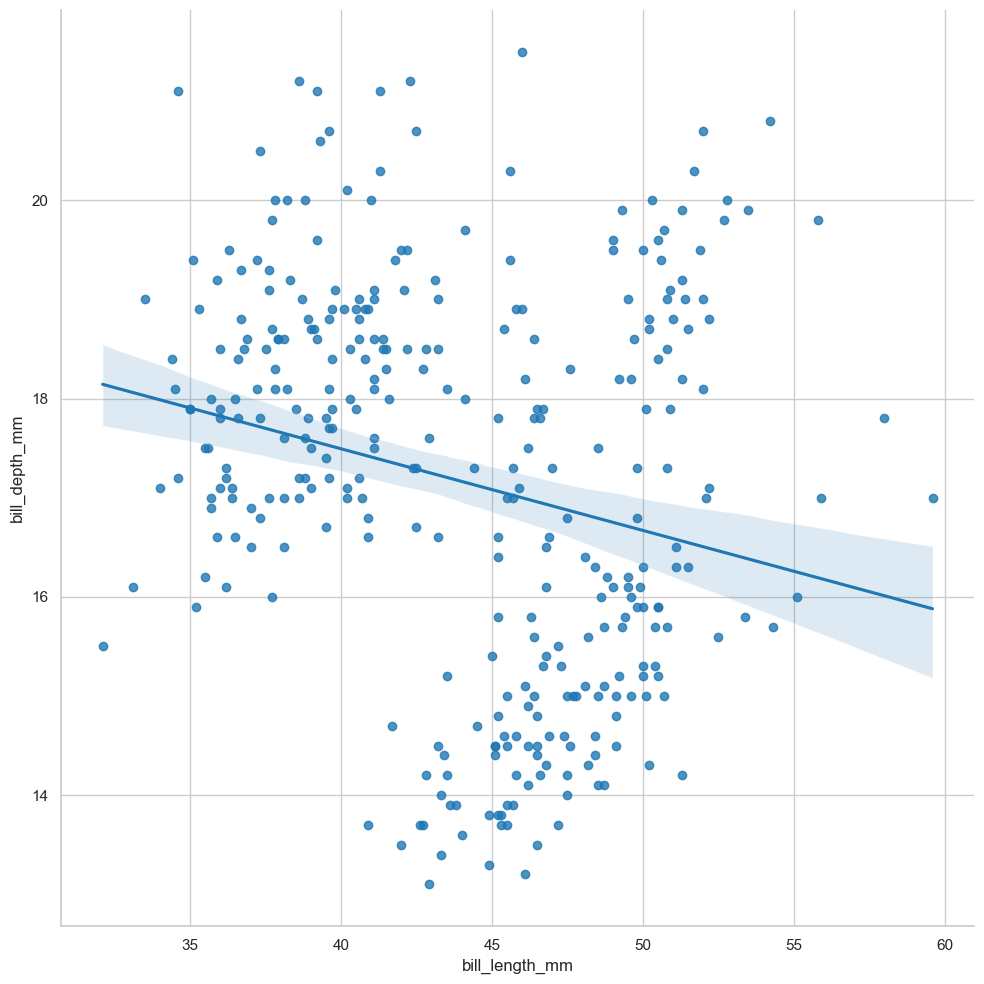

In [74]:
sns.lmplot(
    data= process_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    
)

# Limitaciones del analisis de regresión simple

### La regresión líneal simple no es simétrica

In [75]:
x =  process_penguins_df.bill_length_mm
y =  process_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x,y)
res_y_x = scipy.stats.linregress(y, x)

print(res_x_y, res_y_x, sep= '\n')

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


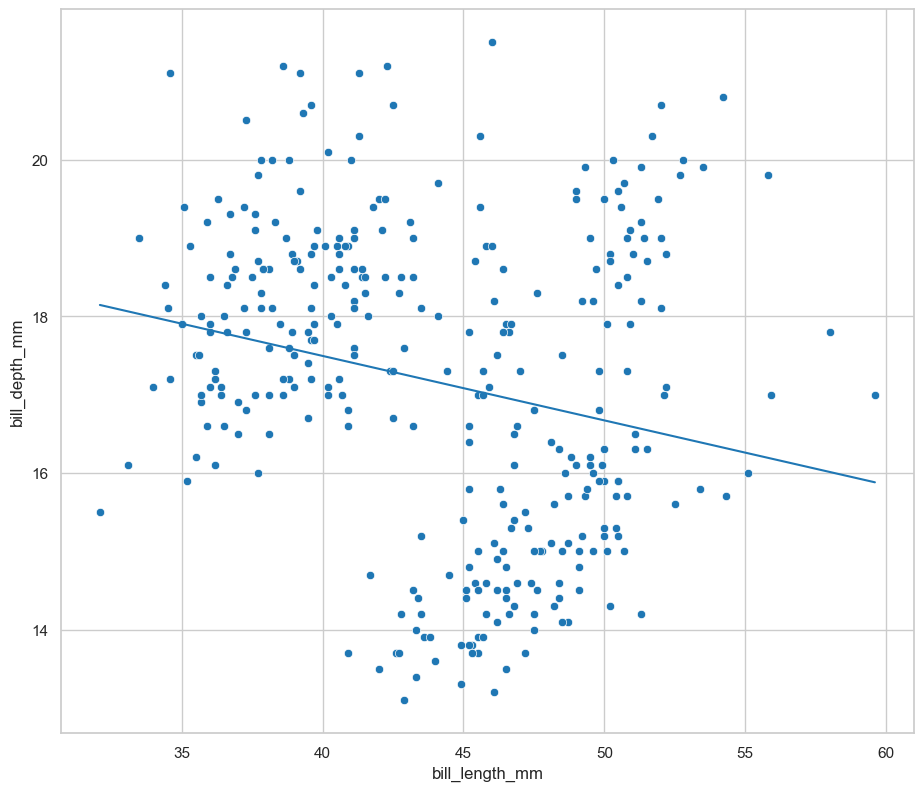

In [76]:
sns.scatterplot(
    x = x,
    y= y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

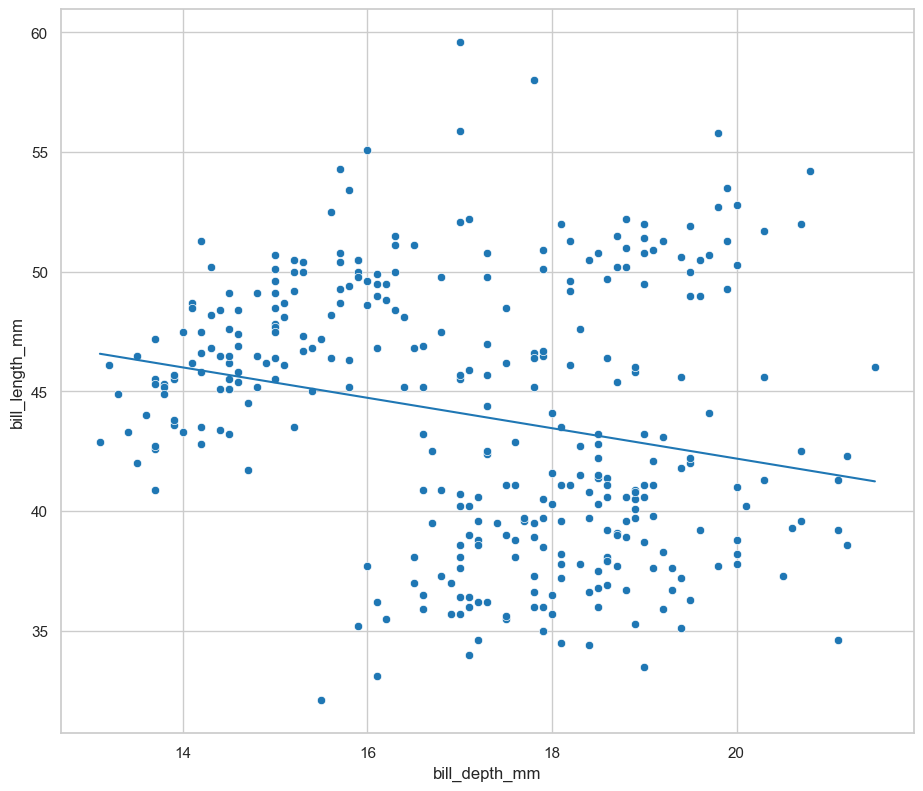

In [77]:
sns.scatterplot(
    x = y,
    y= x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

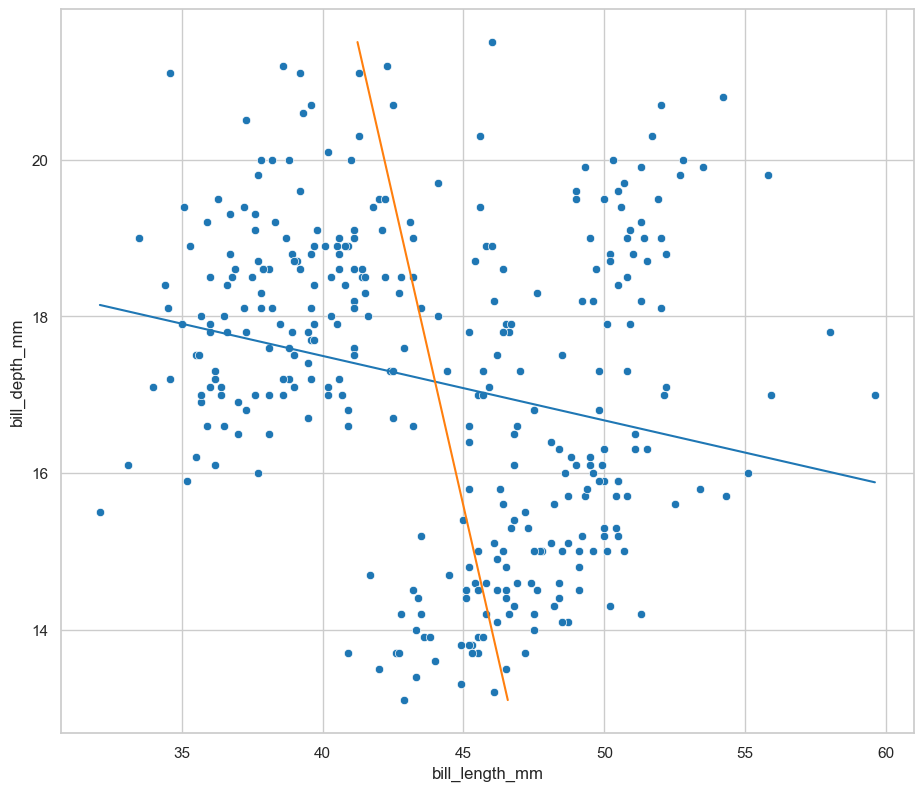

In [78]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

# Analisis de regresión múltiple 

### Olvidé mi báscula para pesar los pinguinos , ¿Cuál sería la mejor forma de capturar ese dato?

### Creando modelos 

### Modelo 1

In [79]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=process_penguins_df
    )
    .fit()
)

model_1.summary()  #descripcion del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.54e-32
Time:                        15:59:39   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model_prueba = smf.ols(formula='body_mass_g ~ bill_length_mm', data=process_penguins_df).fit()
model_prueba.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.54e-32
Time:                        15:59:39   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo 2

In [81]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data= process_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           7.04e-46
Time:                        15:59:39   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### modelo 3

In [82]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=process_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          9.26e-103
Time:                        15:59:39   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### modelo 4

In [83]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=process_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          6.28e-122
Time:                        15:59:39   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### modelo 5

In [84]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=process_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          3.53e-118
Time:                        15:59:39   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizando Resultados 

 Creación de tabla de resultados

In [85]:
model_results = pd.DataFrame(dict(actual_value = process_penguins_df.body_mass_g,
                                  prediction_model_1 = model_1.predict(),
                                  prediction_model_2 = model_2.predict(),
                                  prediction_model_3 = model_3.predict(),
                                  prediction_model_4 = model_4.predict(),
                                  prediction_model_5 = model_5.predict(),
                                  species = process_penguins_df.species,
                                  sex = process_penguins_df.sex))

model_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
339        4000.0         5231.825347         4706.954140         4599.187485   
340        3400.0         4164.286703         4034.121055         4274.552753   
341        3775.0         4693.716437         4475.927353         3839.563668   
342        4100.0         4797.866549         4449.296758         4720.740455   
343        3775.0         4745.791493         4448.061337         4104.268240   

     prediction_model_4  prediction_model_5    species     sex  
0           3579.136946         3441.323750     Adelie    male  
1           3343.220772         3328.384372     Adelie  female  
2           3639.137335         3751.223949     Adelie  female  
4           3457.954243         3657.259599     Adelie  female  
5           3764.536023         3864.163327     Adelie    male  
..                  ...                 ...        ...     ...  
339         4455.022405         4662.860306  Chinstrap    male  
340         3894.857519         4080.099176  Chinstrap  female  
341         4063.639819         4005.109853  Chinstrap    male  
342         4652.013882         4803.806832  Chinstrap    male  
343         3672.299099         3892.170475  Chinstrap  female  

[333 rows x 8 columns]

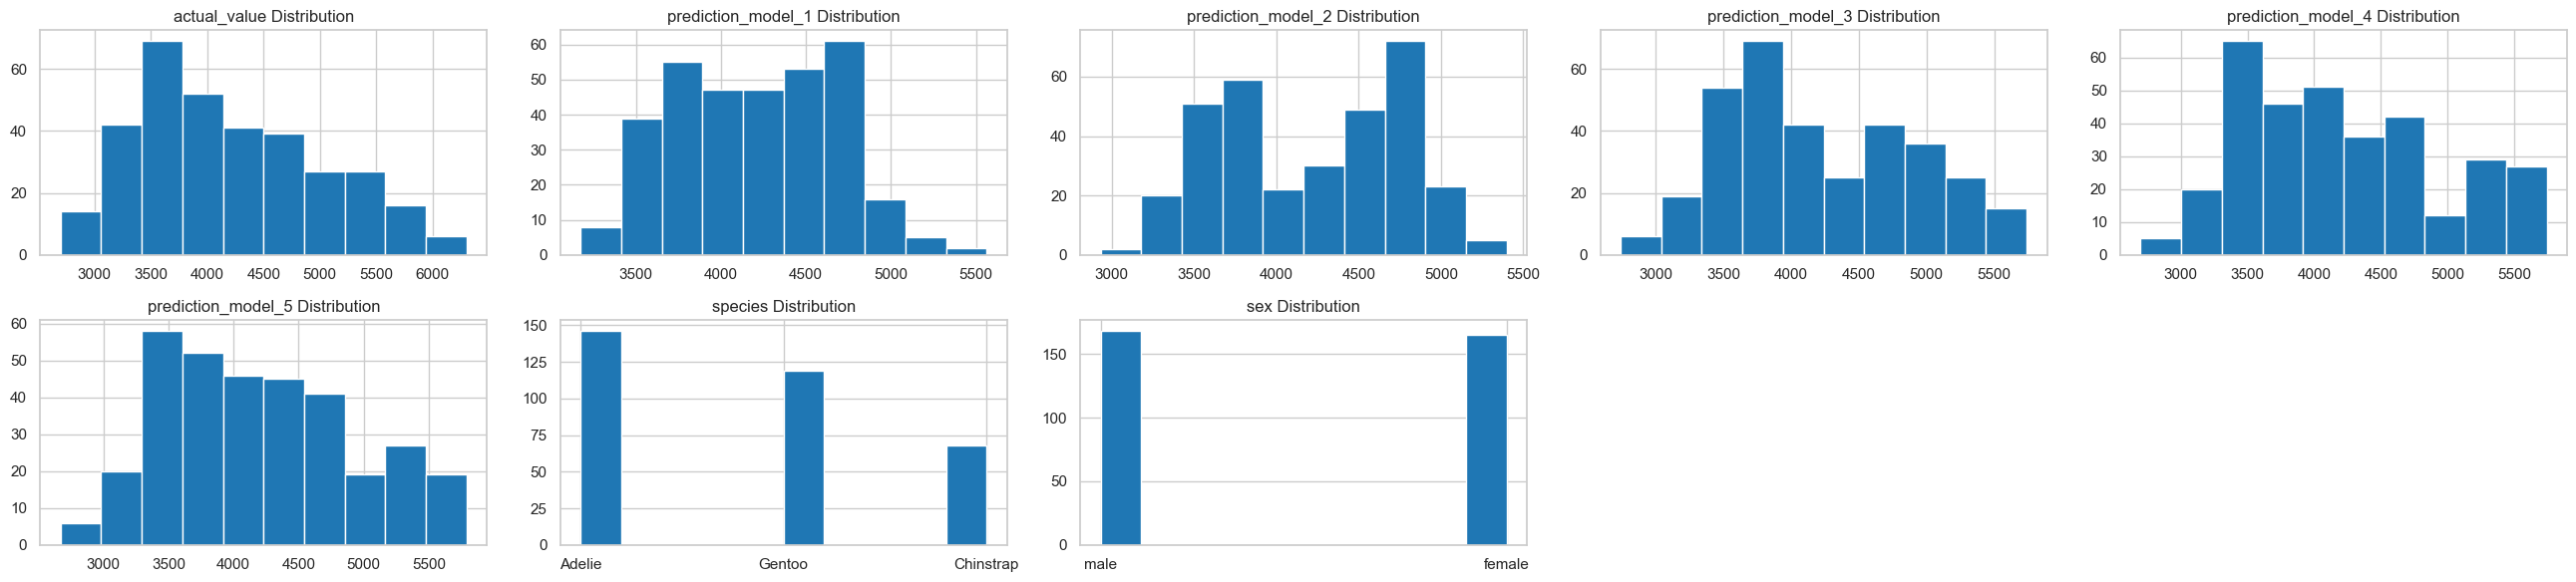

In [86]:
# models_result = DF
variables = model_results.columns
n_rows = 2
n_cols = 5
def draw_histograms(model_results, variables, n_rows, n_cols):
    fig=plt.figure( figsize = (26,6))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        model_results[var_name].hist(ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(model_results , variables , n_rows , n_cols)

### ECDFs

<Axes: ylabel='Proportion'>

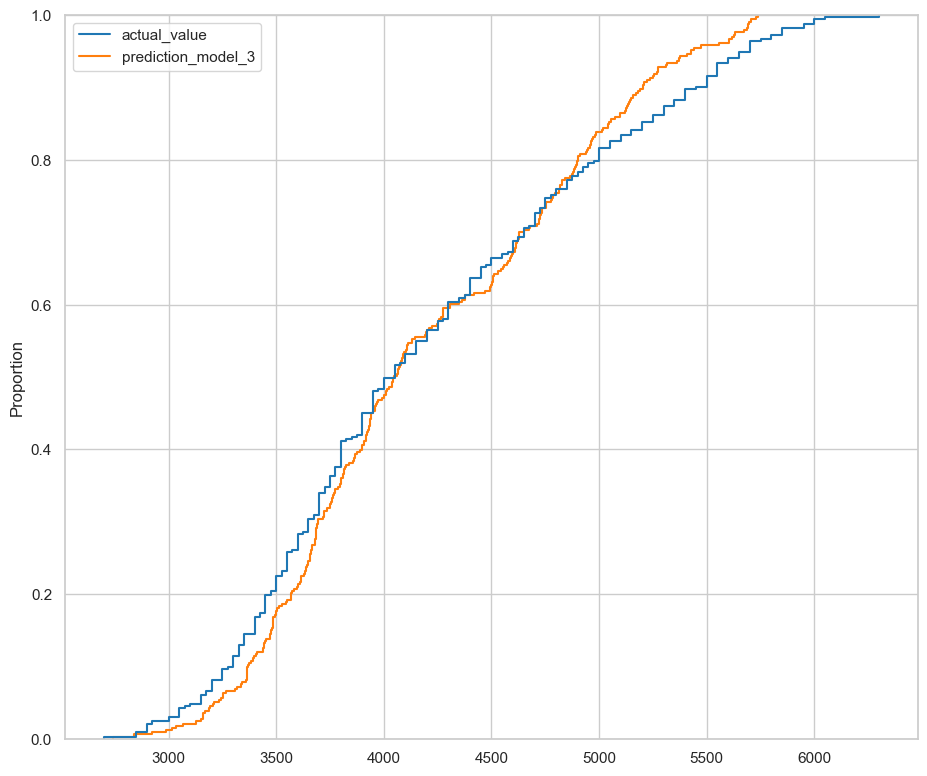

In [87]:
sns.ecdfplot(
    data = model_results.select_columns(['actual_value', 'prediction_model_3'])
)

### PDFs

<Axes: ylabel='Density'>

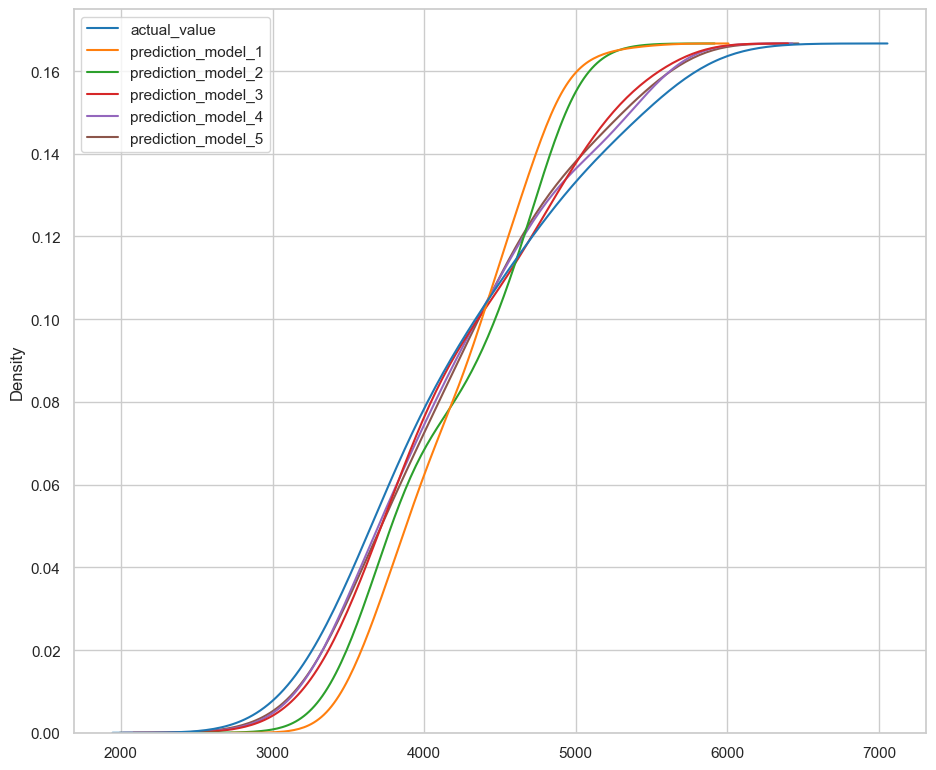

In [88]:
sns.kdeplot(
    data= model_results,
    cumulative=True
)

### ¿Qué pudimos haber encontrado antes de hacer los modelos?

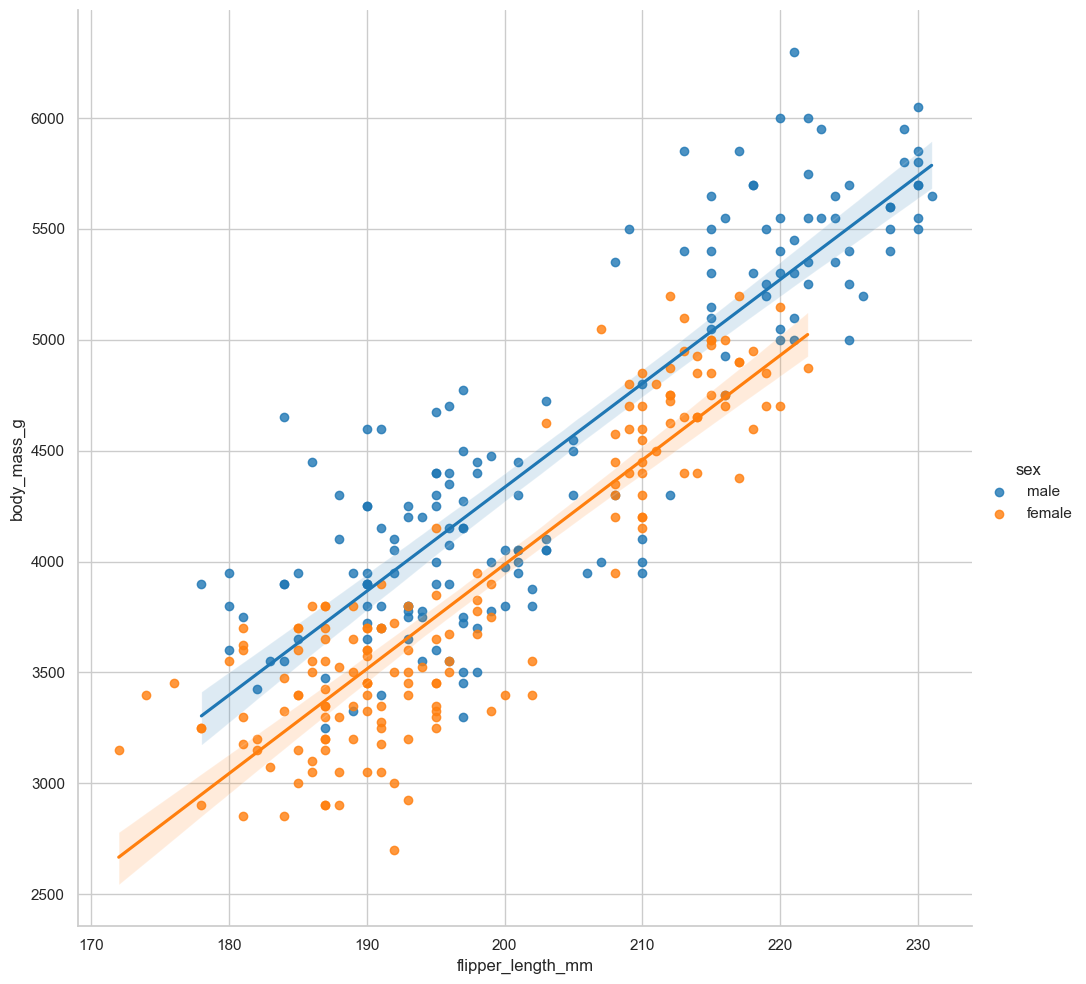

In [89]:
sns.lmplot(
    data=process_penguins_df,
    x = 'flipper_length_mm',
    y =  'body_mass_g',
    hue= 'sex',
    height= 10
)

# Análisis de regresión logistica 

## ¿Podemos crear un modelo que nos ayude a definir si un pinguino es macho o es hembra ? 

In [90]:
smf.logit(
    formula= 'numeric_Sex ~ flipper_length_mm + bill_depth_mm + C(island)',
    data= process_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.376241
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_Sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      328
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                  0.4572
Time:                        15:59:43   Log-Likelihood:                -125.29
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 1.593e-44
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -62.5748      6.798     -9.204      0.000     -75.900     -49.250
C(island)[T.Dream]        -1.0790      0.460     -2.345      0.019      -1.981      -0.177
C(island)[T.Torgersen]    -1.1409      0.594     -1.921      0.055      -2.305       0.023
flipper_length_mm          0.1771      0.022      8.224      0.000       0.135       0.219
bill_depth_mm              1.6150      0.179      9.043      0.000       1.265       1.965
==========================================================================================
"""

# Exploración de nuestras variables categóricas 

In [91]:
process_penguins_df.value_counts(['island', 'sex']).reset_index(name='count')

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

### ¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [92]:
process_penguins_df.loc[:,'is_adelie'] = process_penguins_df['species'].apply(lambda x: 1 if x == 'Adelie' else 0)
# dict = {'Adelie': 1, 'Chinstrap': 0, 'Gentoo': 0}
#process_penguins_df['is_adelie'] = process_penguins_df['species'].map(dict)
# preprocessed_penguins_df = (
#     preprocessed_penguins_df
#     .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
# )

C:\Users\Ramiro\AppData\Local\Temp\ipykernel_19172\648655322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_penguins_df.loc[:,'is_adelie'] = process_penguins_df['species'].apply(lambda x: 1 if x == 'Adelie' else 0)


In [93]:
#Modelo para determinar si un pinguino es adelie segun su sexo y el largo de las aletas
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=process_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [94]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = process_penguins_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()  #round indica solo si es cero o uno
    )
)

is_adelie_df_prediction

actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
339              0               0.0
340              0               0.0
341              0               1.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

In [95]:
(
    is_adelie_df_prediction
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
)

actual_adelie  predicted_values  count
0              0               0.0    151
1              1               1.0    129
2              0               1.0     36
3              1               0.0     17

In [96]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_prediction.actual_adelie,
        is_adelie_df_prediction.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_prediction.actual_adelie,
    is_adelie_df_prediction.predicted_values
)


[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson 

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

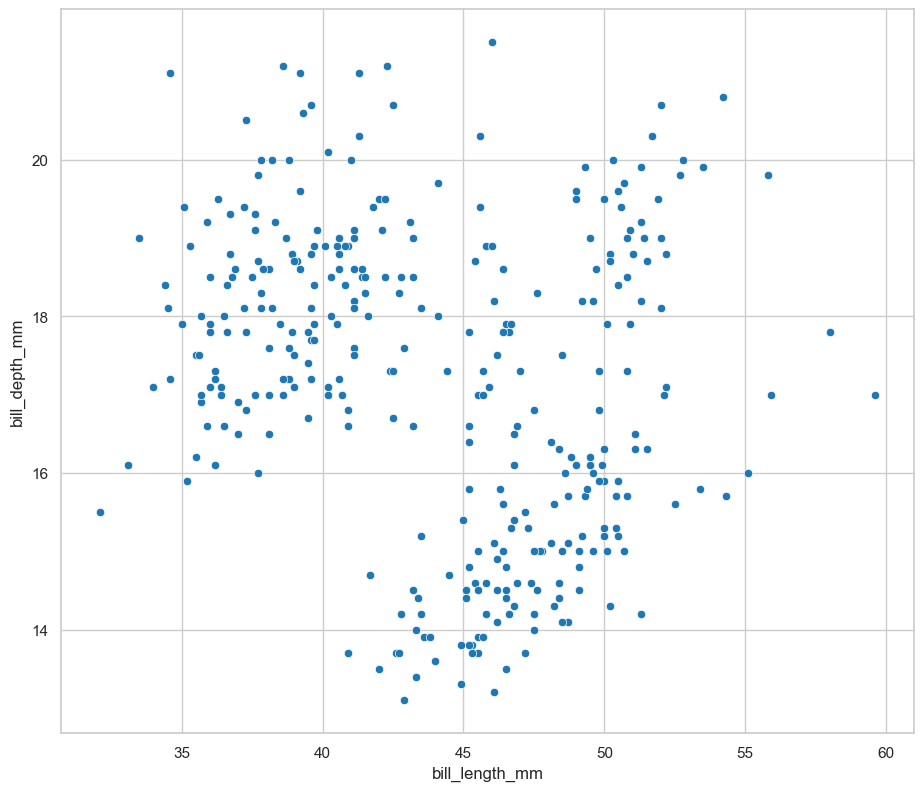

In [97]:
sns.scatterplot(
    data = process_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

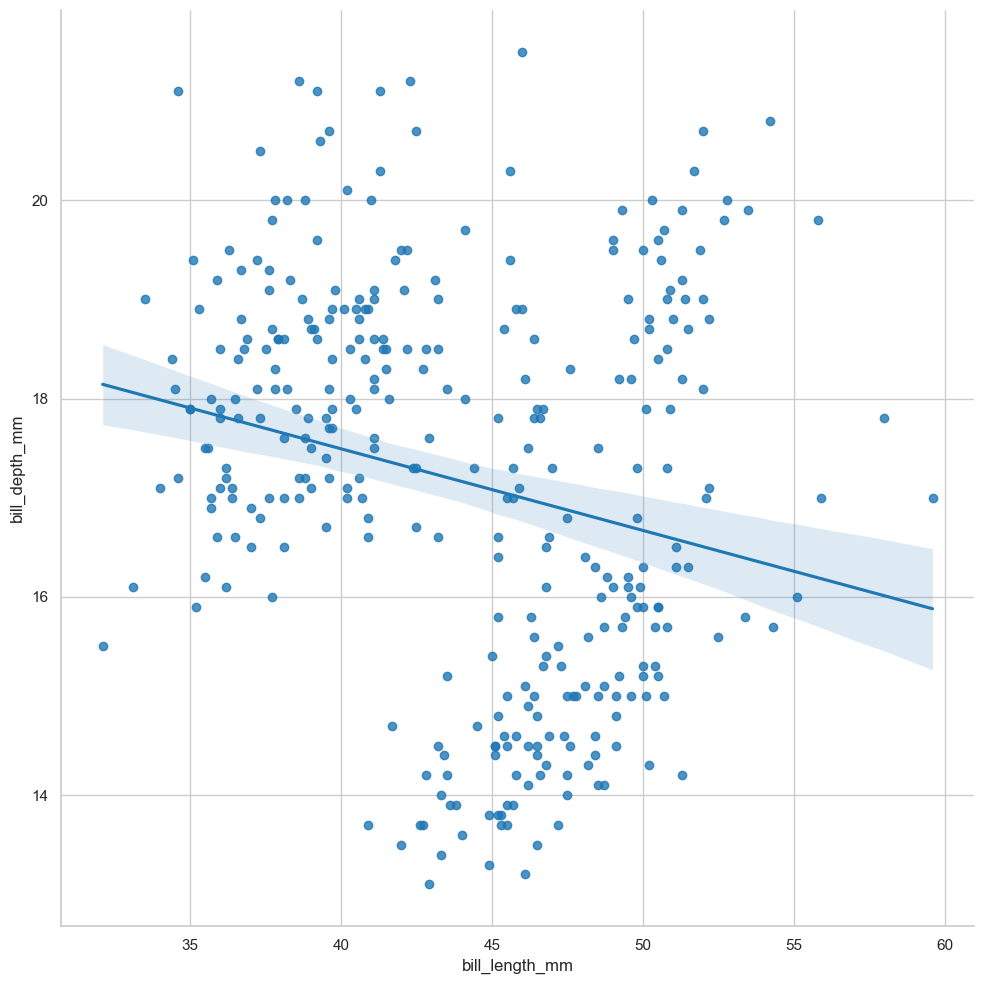

In [98]:
sns.lmplot(
    data = process_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm', 
    height= 10
)

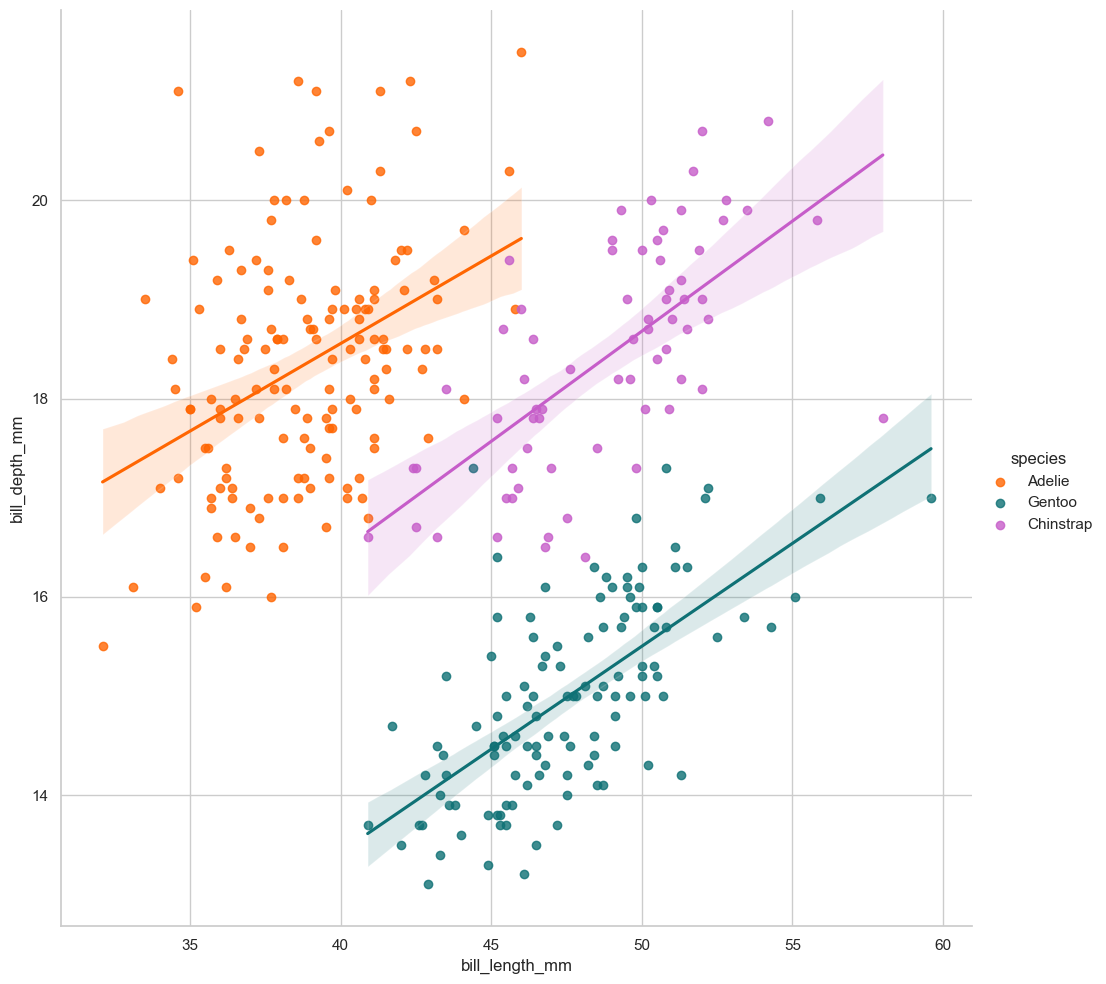

In [99]:
sns.lmplot(
    data = process_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm', 
    hue='species',
    palette= penguin_color,
    height= 10
)

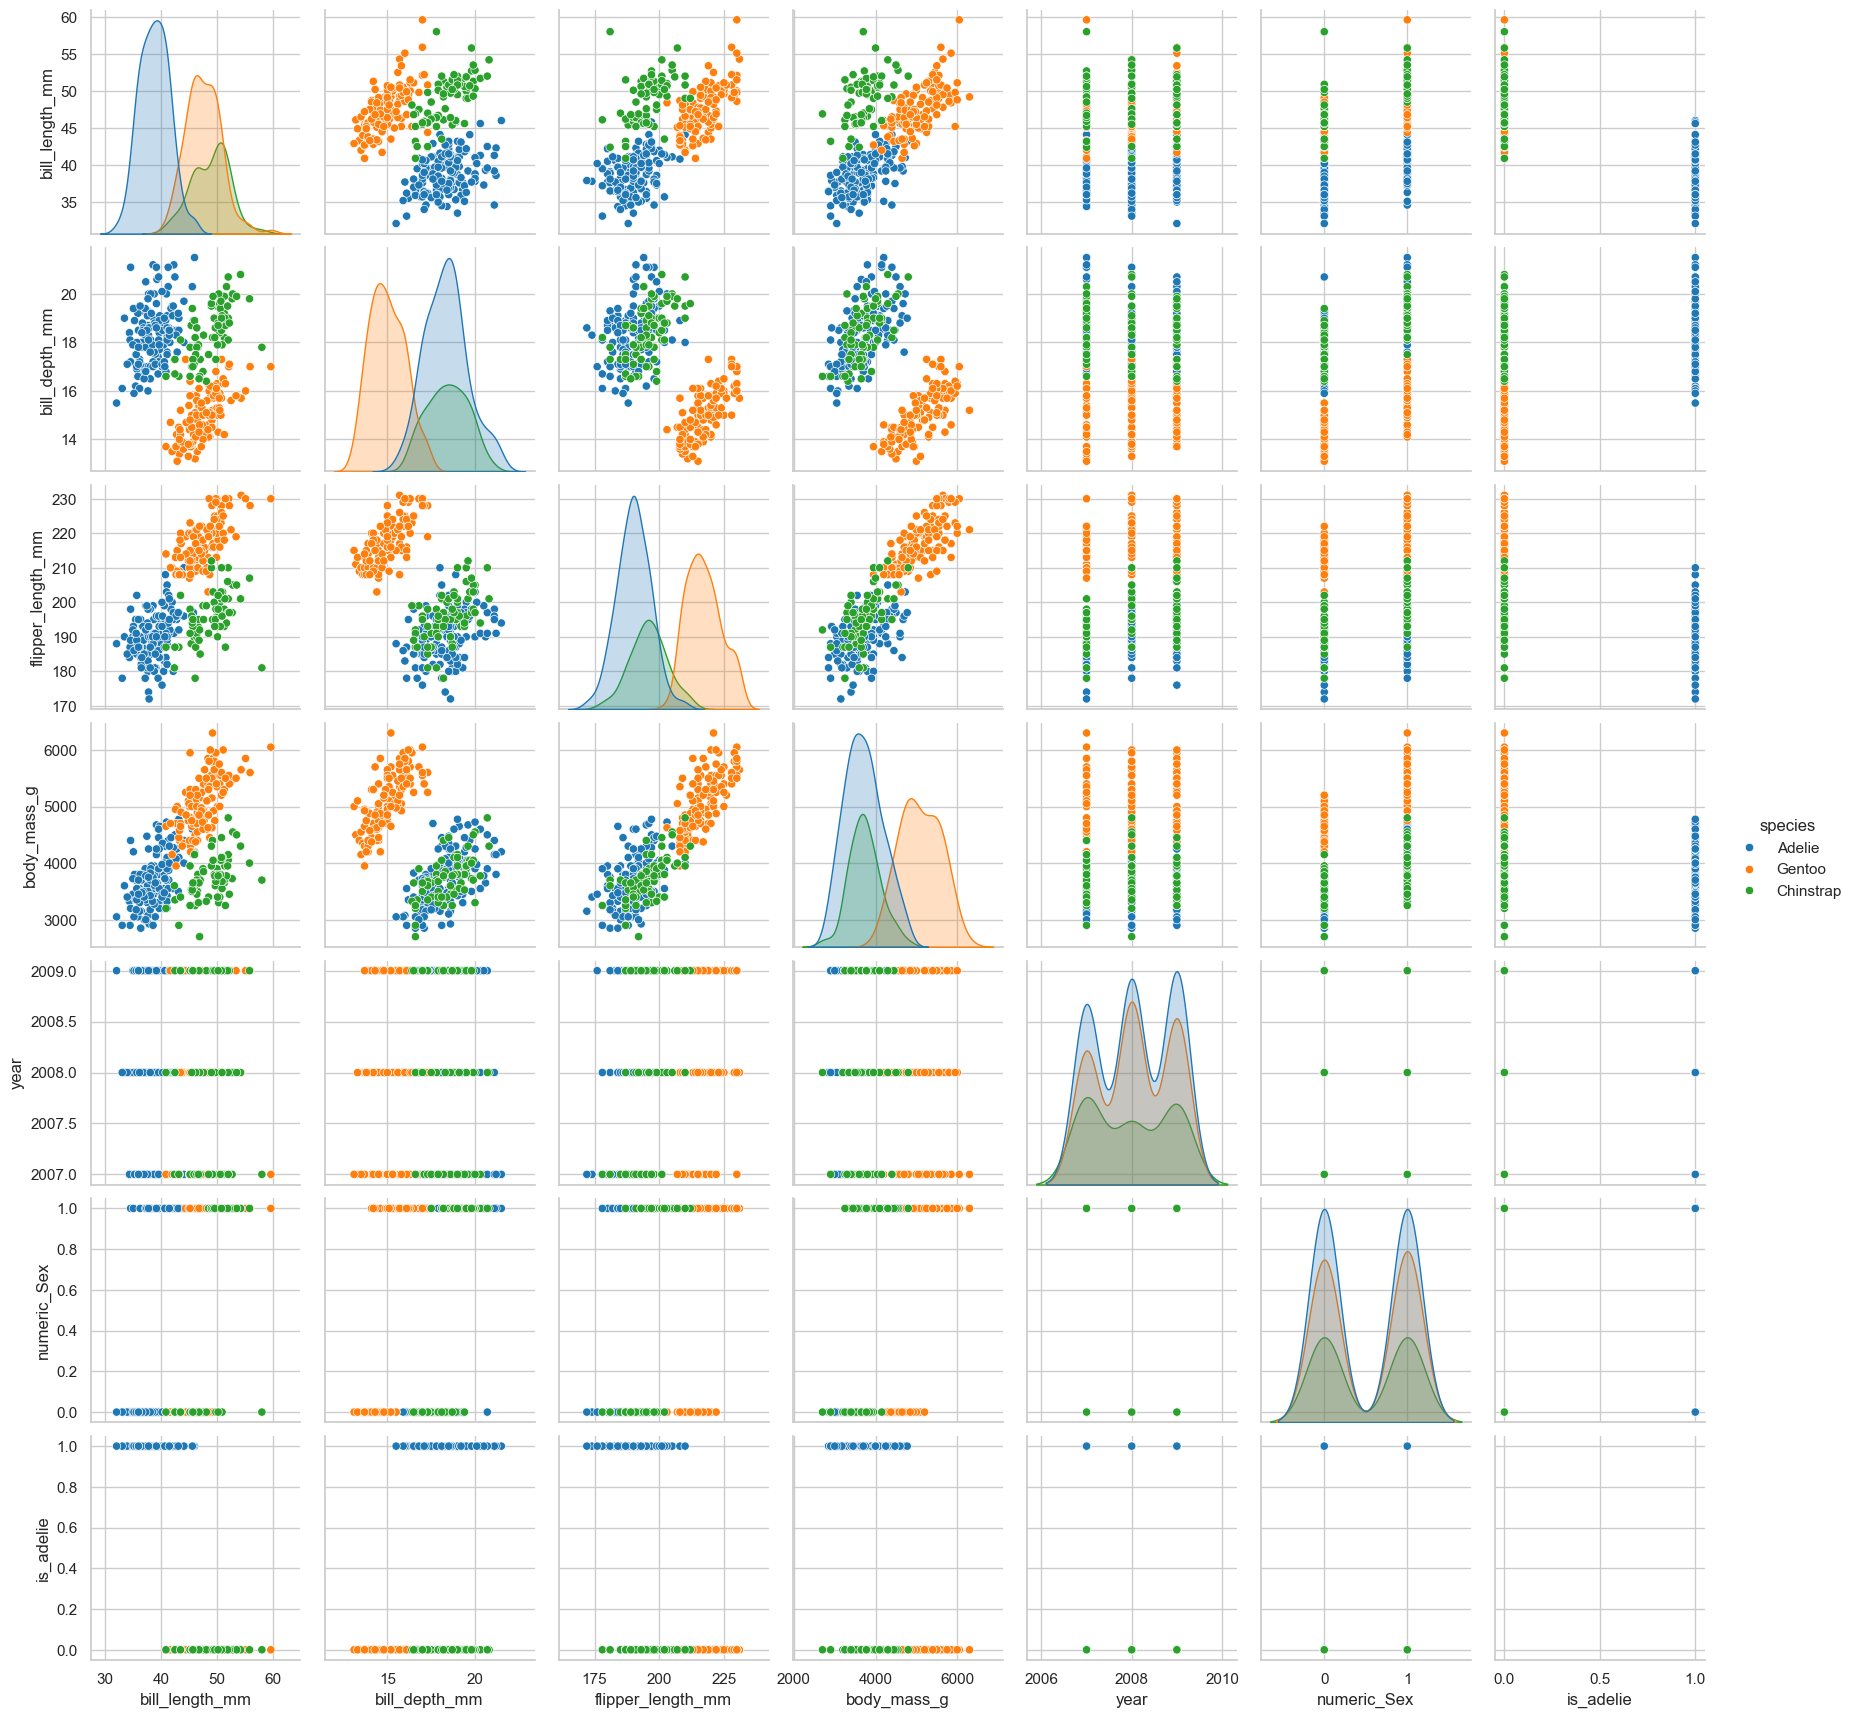

In [100]:
sns.pairplot(data=process_penguins_df, hue='species')

In [103]:

process_penguins_df.dtypes.value_counts()


float64    4
object     3
int64      3
Name: count, dtype: int64

In [102]:
import palmerpenguins
import pandas as pd
import pandas_profiling as pp

df = palmerpenguins.load_penguins()

pp.ProfileReport(df)

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
process_penguins_df.describe(include=[object, 'category'])

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

In [ ]:
process_penguins_df.drop